## Final Project Submission

Please fill out:
* __Student name:__ Sharonda Warner
* __Student pace:__ part-time |  06102019 Cohort
* __Scheduled project review date/time:__ Wednesday, August 7⋅8:00 – 9:00am
* __Instructor name:__ Pablo Crespo
* __Blog post URL:__ https://www.dropbox.com/s/3h6npef1vkvl1mw/BLOG-%20Exploring%20Your%20Data%20With%20Histograms.pdf?dl=0


In [1]:
from datetime import datetime 
start_time = datetime.now() 

In [2]:
# Import Libraries
import os
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Dataset Description
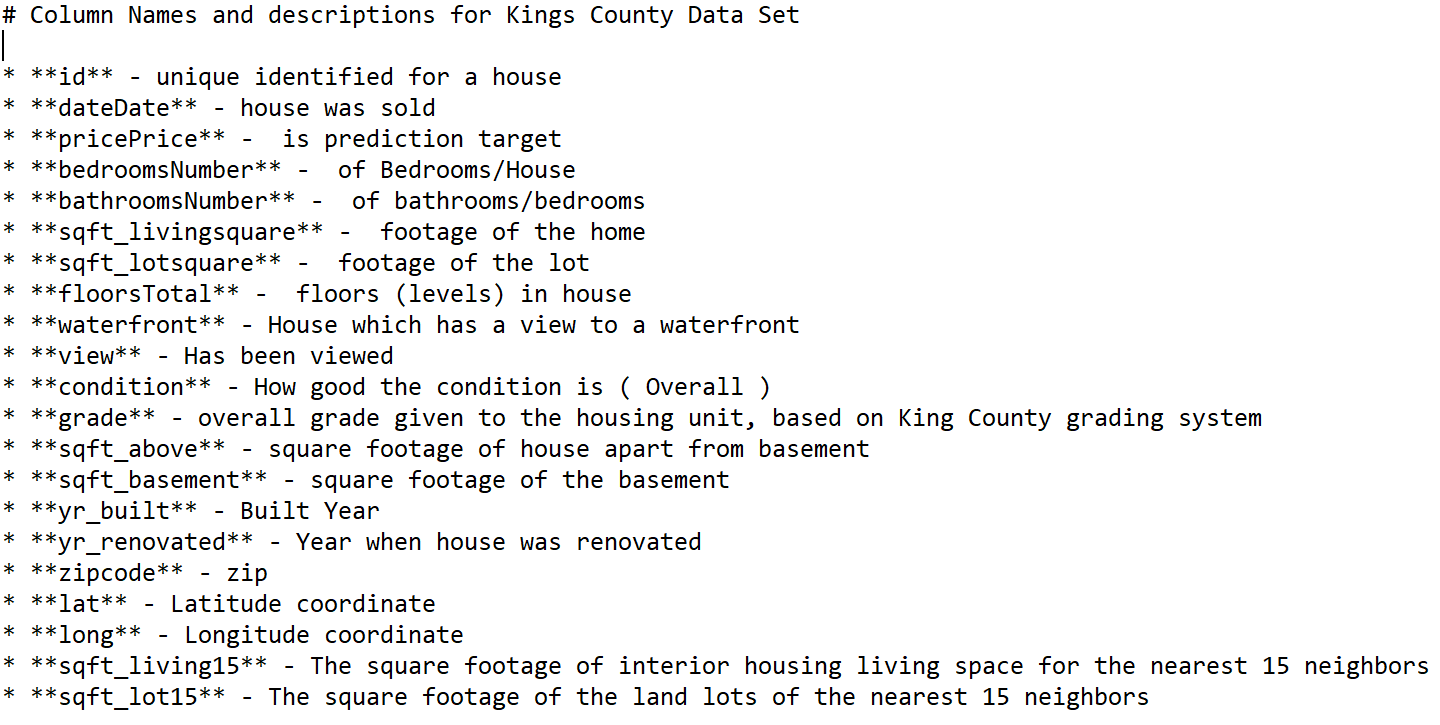


In [3]:
# Read in data file and preview the rows
house_df = pd.read_csv("./kc_house_data.csv")
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Exploratory Data Analysis (EDA)

In [4]:
# Describe the data structure
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


__Observation__:  DTYPE ISSUES
- dtypes: date (object) covert to datetime, sqft_basement (object) convert to int64


In [5]:
# Check data for null values
house_df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

__Observation__:   NULL VALUES
- isnull: waterfront (2376), yr_renovated (3842), view (63)

In [6]:
# Percent of null values:

# df.isnull().sum() * 100/21597
house_df.isnull().sum() * 100/len(house_df.index)

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

In [7]:
# Generate descriptive statistics that summarize the central tendency,dispersion and shape of a dataset's distribution.  
# Check 5 points statistics.
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


__Observation__:   5 Point Statistics
- bedroom      - max = 33; mean 3.3
- bathroom     - mean 2.11
- condition    - 50% = 3
- grade        - 50% = 7
- waterfront   - 75% 0s; min=0; max=1
- view         - 75% 0s; min=0; max=4 
- yr_renovated - 75% 0s; min=0; max=2015
- Missing values for sqft_basement and date (dtype = object)
- Avg price = $540K; Avg sqft living = 2080; Avg grade = 7

__Q/A__
- Q: Why is sqft_basement and date missing from .describe()?  A: (dtype = object)
- Q: Why does view ONLY have values 0-4?  A: Categ. used to identify the type of view a property has.
- Q: Is bedroom max=33 a mistake or variance? A mistake, further investigation show that the sqft and price does not support a home with 33 bedrooms

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


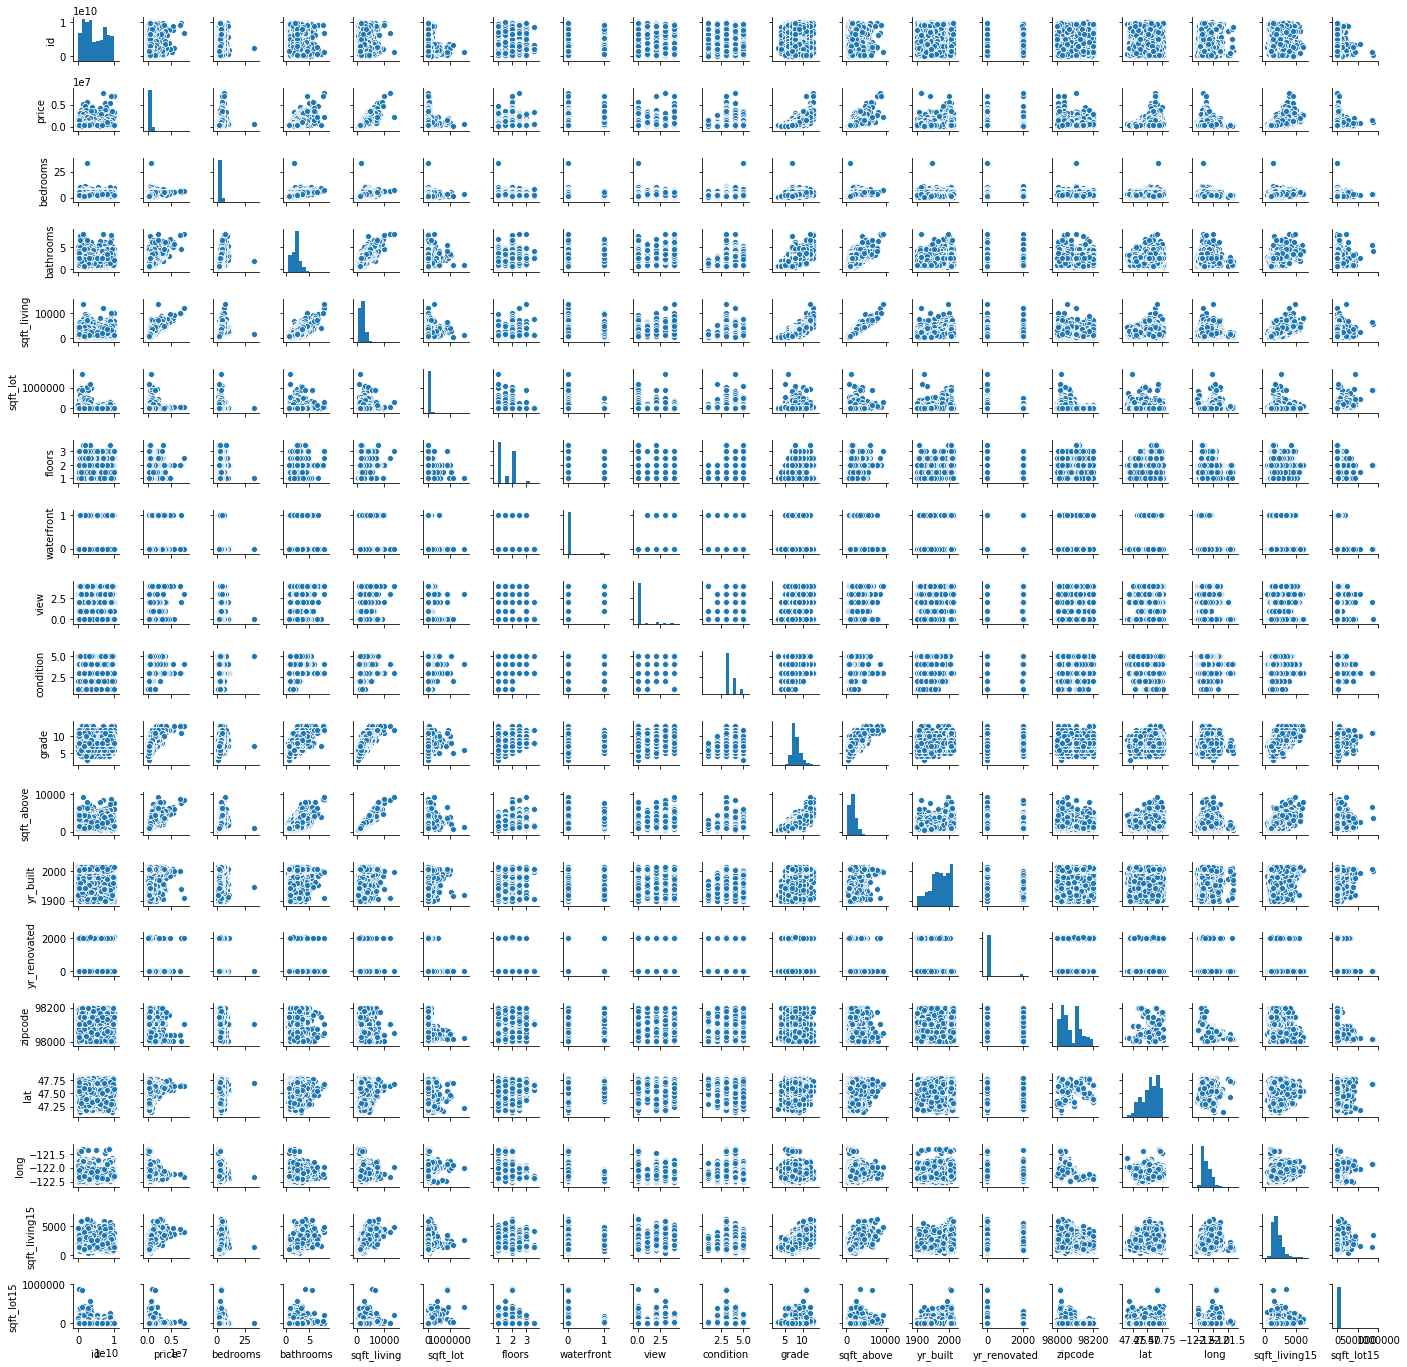

In [8]:
# Take a visual look at the dataset
sns.pairplot(house_df, height=1);

__Observation:__
- Missing data date and sqft_basement because dtype(object)
- grade seems normally distributed, other cols seem to be skewed to the right
- Date:  yr_renovated: (0, 2000), yr_built (1900-2000)
- waterfront (0,1), view, condition, grade, floors, and bathrooms - (single digits - teens); maybe Categorical data
- Several sqft cols; Continuous data

In [9]:
# Checking for extraneous values and top value counts (normalized) for each column in dataset

for col in house_df.columns:
    print(col, "\n", house_df[col].value_counts(normalize=True).head(10), "\n\n")

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
3969300030    0.000093
2560801222    0.000093
3883800011    0.000093
2228900270    0.000093
251300110     0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/25/2014    0.006066
6/26/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
3/25/2015    0.005695
4/14/2015    0.005603
7/9/2014     0.005603
4/28/2015    0.005603
4/22/2015    0.005603
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
325000.0    0.006853
400000.0    0.006714
375000.0    0.006390
300000.0    0.006158
525000.0    0.006066
Name: price, dtype: float64 


bedrooms 
 3     0.454878
4     0.318655
2     0.127796
5     0.074131
6     0.012594
1     0.009075
7     0.001760
8     0.000602
9     0.000278
10    0.000139
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00   

__Observation__:   Extraneous values and Value counts
- sqft_basement has extraneous values  sqft_basement = " ? "        0.021021  = 2.1%
- view = 90%, 0s; yr_renovated = 95%, 0s; waterfront = 99%, 0s, sqft_basement = 59%, 0s

In [10]:
# Number of unique bedroom values:
house_df["bedrooms"].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [11]:
house_df.loc[house_df["bedrooms"] > 11]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


__Observation__:   Outlier
- bedroom      - max = 33 - Outlier (1 row) - Looks like a mistake for price=$640,000, floors=1, bathroom=1.75 and sqft_living = 1620 

In [12]:
# Find any duplicate rows in the dataset -- using duplicate()
dupl_df = house_df.duplicated()
dupl_df.value_counts()

False    21597
dtype: int64

__Observation__:   Duplicate Rows 
- No duplicate rows found in the dataset

In [13]:
# EDA - Lat and Long datapoints
# https://roadsidethoughts.com/wa/roxbury-heights-xx-king-summary.htm

In [14]:
house_df["lat"].describe() # Seattle, Wa --- Roxbury Heights, Washington

count    21597.000000
mean        47.560093
std          0.138552
min         47.155900
25%         47.471100
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

In [15]:
house_df["long"].describe()  # Seattle, Wa ---Roxbury Heights, Washington

count    21597.000000
mean      -122.213982
std          0.140724
min       -122.519000
25%       -122.328000
50%       -122.231000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

In [16]:
house_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [17]:
house_df.shape

(21597, 21)

### Data Cleaning

In [18]:
# Create new dataframe for cleaning the dataset
df_clean = house_df

In [19]:
# Convert date dtype from object to datetime
df_clean["date"] = pd.to_datetime(df_clean["date"])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

In [20]:
df_clean["sqft_basement"].value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [21]:
# Convert sqft_basement dtype from object to int64
df_clean["sqft_basement"] = pd.to_numeric(df_clean["sqft_basement"], errors='coerce') # dtype = float

In [22]:
df_clean["sqft_basement"].isna().sum()

454

In [23]:
df_clean["sqft_basement"].median(axis=0)

0.0

In [24]:
# Replacing NAN values in sqft_basement with 0 
df_clean["sqft_basement"].fillna(0, inplace = True) 
df_clean["sqft_basement"] = df_clean["sqft_basement"].astype(np.int64)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(12)
memory usage: 3.5 M

__ACTION:__
- Replaced errorenous data ("?") in sqft_basement with NAN
    - Updated 454 rows with the median of sqft_basement.  Median = 0.0
    - Updated dtype to int64 to match other sqft columns dtypes in the dataset

In [25]:
df_clean["waterfront"].unique()

array([nan,  0.,  1.])

In [26]:
df_clean["waterfront"].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [27]:
# Replacing NAN values in waterfront with 0 
df_clean["waterfront"].fillna(0, inplace = True) 

In [28]:
# Set data type to boolean value.  Values: 0,1
#df_clean["waterfront"] = df_clean["waterfront"].astype('bool')

In [29]:
# Replacing NAN values in view with 0 
df_clean["view"].fillna(0, inplace = True) 

In [30]:
# Replacing NAN values in yr_renovated with 0 
df_clean["yr_renovated"].fillna(0, inplace = True) 

__ACTION__:

- Replaced NULL values (NAN) with the most frequently used value for the following columns:
    - yr_renovated = 0, view = 0 and waterfront = 0


In [31]:
df_clean.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [32]:
# Dropping the following columns from the dataframe
drop_list = ["id", "date"]
df_clean = df_clean.drop(drop_list,axis=1)

In [33]:
df_clean.shape

(21597, 19)

__Action:__
- Dropping ID column:   Randomly generated field used for unique identification purposes only
- Dropping Date column: This datetime column requires more processing to model. 

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11)
memory usage: 3.1 MB


### Inspecting Data for Outliers

#### Visualize Outliers

In [35]:
# Visualize Outliers - using Boxplots

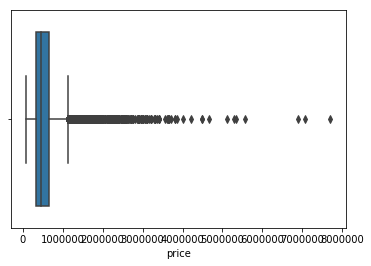

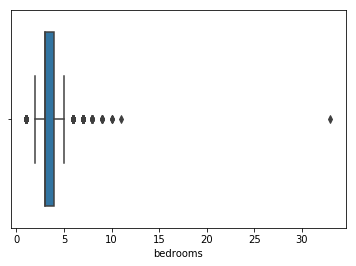

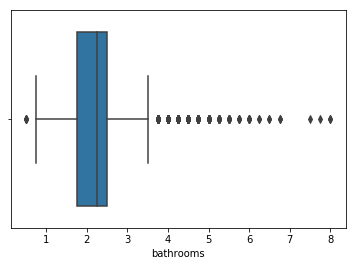

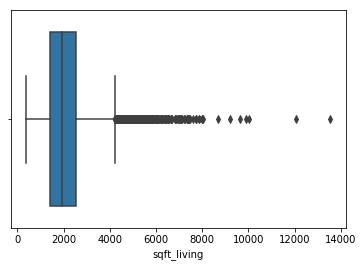

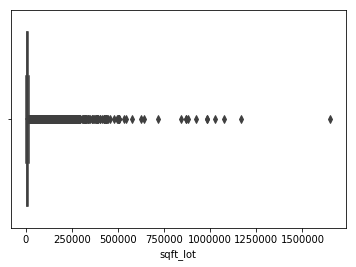

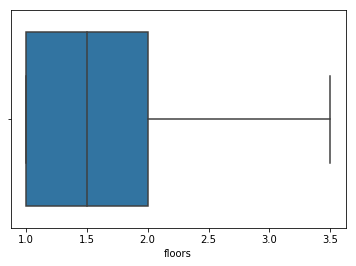

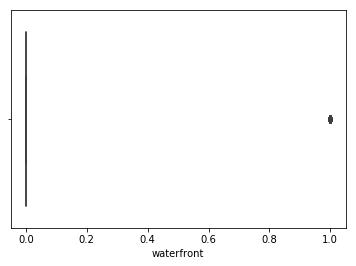

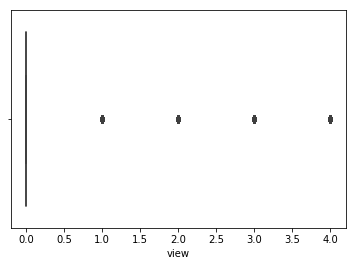

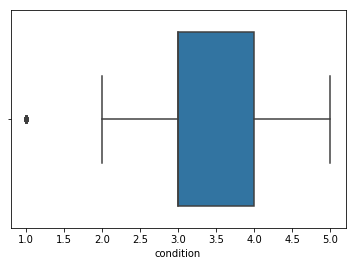

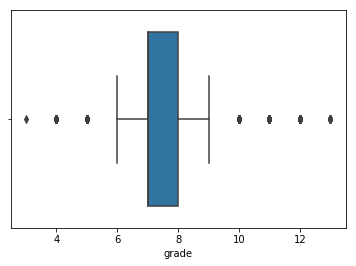

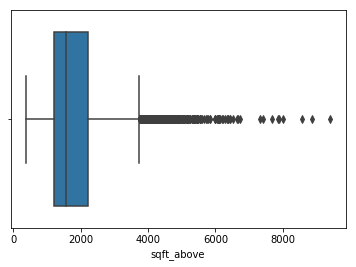

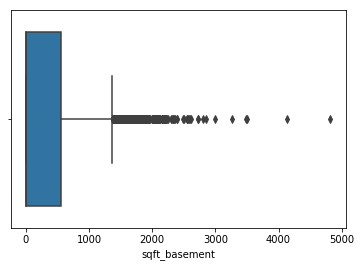

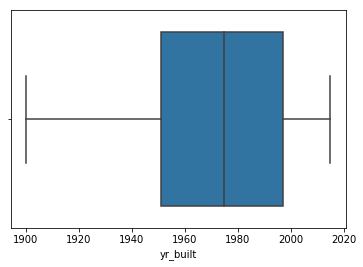

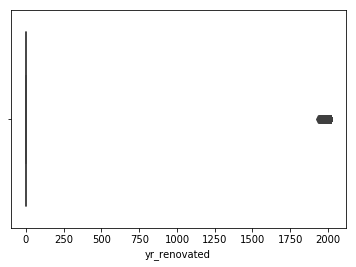

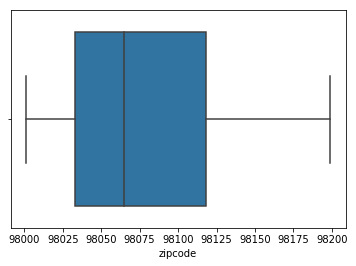

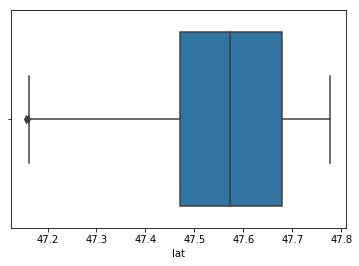

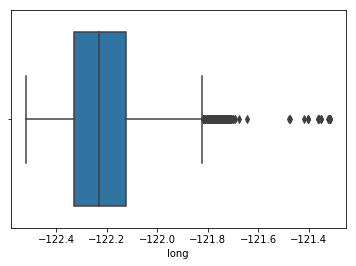

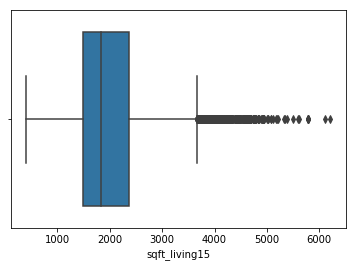

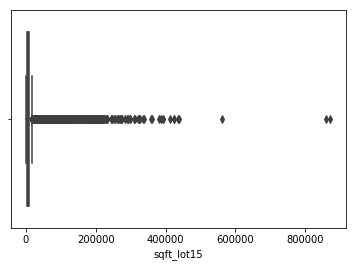

In [36]:
for col in df_clean.columns:
    sns.boxplot(x = df_clean[col])
    plt.show()

#### Detect Outliers in the dataset

In [37]:
# Detecting Outliers in the following outlier_X_cols var 
outlier_drop_list_X = ["price", "waterfront","view",
                      "condition","grade", "yr_built", "yr_renovated","zipcode",
                      "lat", "long"] # Do not remove outliers based on Target and Categorical cols

outlier_X_cols = df_clean.drop(outlier_drop_list_X, axis=1)
print(outlier_X_cols.head())

   bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
0         3       1.00         1180      5650     1.0        1180   
1         3       2.25         2570      7242     2.0        2170   
2         2       1.00          770     10000     1.0         770   
3         4       3.00         1960      5000     1.0        1050   
4         3       2.00         1680      8080     1.0        1680   

   sqft_basement  sqft_living15  sqft_lot15  
0              0           1340        5650  
1            400           1690        7639  
2              0           2720        8062  
3            910           1360        5000  
4              0           1800        7503  


In [38]:
# Find the rows in the dataset impacted by outliers
from scipy import stats
import numpy as np

threshold = 3
z_score = np.abs(stats.zscore(outlier_X_cols))  # z-scores => (x-mean)/sd
outliers_rowid = np.where(z_score > 3)

#### Remove Outlier Rows 

In [39]:
# Before removing Outliers
df_clean.shape

(21597, 19)

In [40]:
# Remove row where bedroom == 33, seems to be a mistake vs a variance in the data
bedrm_rowid = np.where(df_clean["bedrooms"] == 33)
bedrm_rowid
df_clean.iloc[bedrm_rowid].head()
df_clean.drop(df_clean.index[bedrm_rowid], axis = 0, inplace=True)

In [41]:
for rowid in outliers_rowid:
    df_clean.drop(df_clean.index[rowid], axis = 0, inplace=True)

In [42]:
# After removing Outliers
df_clean.shape

(20412, 19)

### Data Preprocessing

In [43]:
# Create new dataframe(s) for processing the dataset
df_pd = df_clean

In [44]:
# Creates a list object of X_cols for column names
X_cols = [col for col in df_pd.columns]  
X_cols.remove("price")
X_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


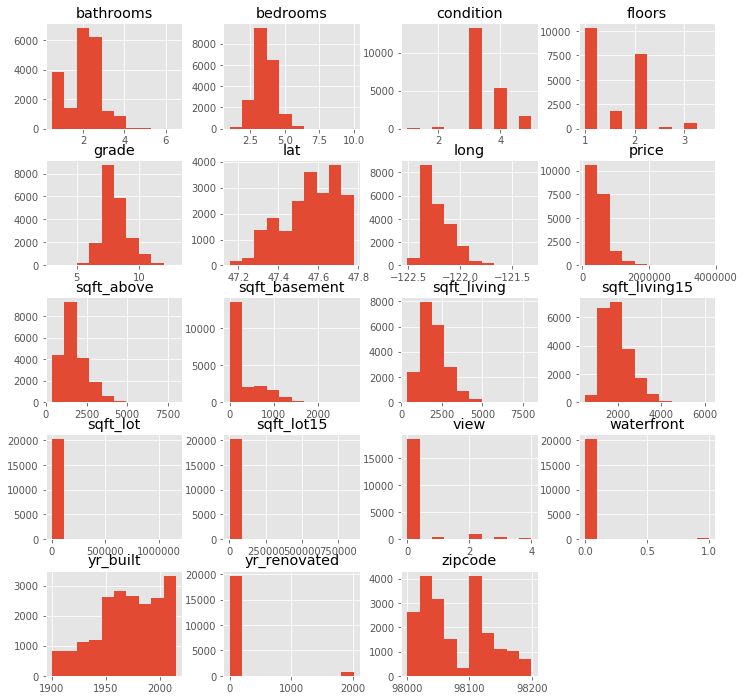

In [45]:
# Review Data Distribution - using histogram  
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,12))
ax1 = fig.gca()
df_pd.hist(ax=ax1)
plt.show()

__Observe:__
- Grade = normal dist
- Other cols looked skewed to the right, except - yr_built, lat (skewed to the left)
- zipcode seems to have 2 peaks

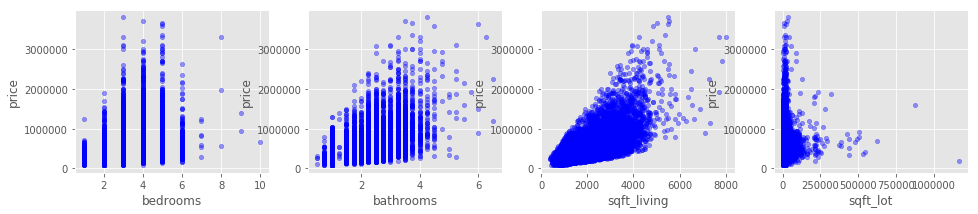

In [46]:
# Review linearity and categorical data - using scatterplot
plt.style.use("ggplot")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax1 in zip(list(X_cols)[0:4], axes):
    df_pd.plot(kind='scatter', x= xcol, y="price", ax=ax1, alpha=0.4, color='b')

__Observe:__
- Pricing impacts with bedrooms (3-5); bathrooms (3-4); sqftliv (4000-6000)

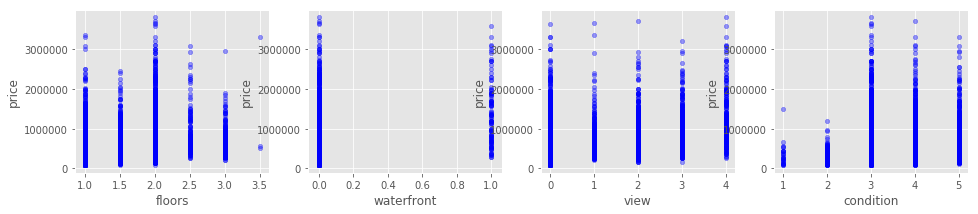

In [47]:
# Review linearity and categorical data - using scatterplot
plt.style.use("ggplot")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax1 in zip(list(X_cols)[4:8], axes):
    df_pd.plot(kind='scatter', x= xcol, y="price", ax=ax1, alpha=0.4, color='b')

__Observe:__
- Pricing impact: floors (2); waterfront (both values); view (4); condition (3-4)
    

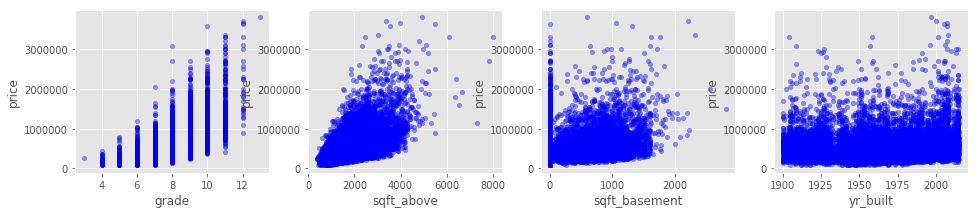

In [48]:
# Review linearity and categorical data - using scatterplot
plt.style.use("ggplot")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax1 in zip(list(X_cols)[8:12], axes):
    df_pd.plot(kind='scatter', x= xcol, y="price", ax=ax1, alpha=0.4, color='b')

__Observe:__
- Pricing impact: grade (>10); sqft above(4000-5000); sqft basemt(0, 1000-1500); yr_built (> 2000)

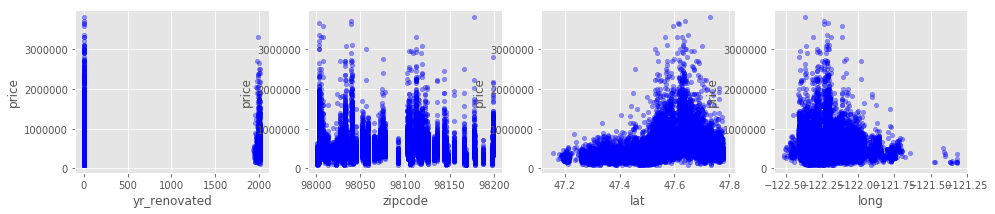

In [49]:
# Review linearity and categorical data - using scatterplot
plt.style.use("ggplot")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax1 in zip(list(X_cols)[12:16], axes):
    df_pd.plot(kind='scatter', x= xcol, y="price", ax=ax1, alpha=0.4, color='b')

__Observe:__
- Pricing impact: zipcode (98000-98050 and 98100-98125), lat (47.6 -47.7), long (-122.50, -122.25)

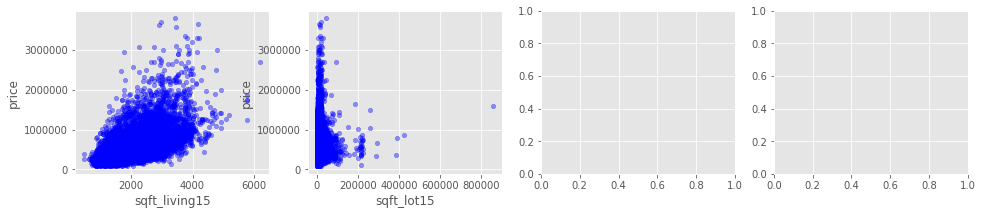

In [50]:
# Review linearity and categorical data - using scatterplot
plt.style.use("ggplot")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax1 in zip(list(X_cols)[16:20], axes):
    df_pd.plot(kind='scatter', x= xcol, y="price", ax=ax1, alpha=0.4, color='b')

__Observe:__
- Pricing impact: sqft liv15 (3000-4000)

__Observation:__
- Candidate list of categorical variables:
    - waterfront
    - grade
    - condition
    - 1-yr_renovated
    - 1-yr_built
    - zipcode
    - lat
    - long
    - view
    - sqft basement - [0,1]  0= No sqft, therefore, no basement


#### Create Categorical Variables

In [51]:
df_pd["waterfront"].describe()

count    20412.000000
mean         0.005291
std          0.072548
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [52]:
df_pd["waterfront"].unique()

array([0., 1.])

In [53]:
df_pd["waterfront"].value_counts()

0.0    20304
1.0      108
Name: waterfront, dtype: int64

In [54]:
wf_dummies = pd.get_dummies(df_pd["waterfront"], prefix="wf", drop_first=True)
wf_dummies.head() # Row 50 is waterfront property

,wf_1.0
11,0
12,0
13,0
14,0
15,0


In [55]:
df_pd["view"].describe()

count    20412.000000
mean         0.206447
std          0.714569
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [56]:
df_pd["view"].unique()

array([0., 3., 2., 4., 1.])

In [57]:
view_dummies = pd.get_dummies(df_pd["view"], prefix="view", drop_first=True)
view_dummies.head() 

,view_1.0,view_2.0,view_3.0,view_4.0
11,0,0,0,0
12,0,0,0,0
13,0,0,0,0
14,0,0,0,0
15,0,0,1,0


In [58]:
grad_dummies = pd.get_dummies(df_pd["grade"], prefix="grad", drop_first=True)
grad_dummies.head() 

,grad_4,grad_5,grad_6,grad_7,grad_8,grad_9,grad_10,grad_11,grad_12,grad_13
11,0,0,0,1,0,0,0,0,0,0
12,0,0,0,1,0,0,0,0,0,0
13,0,0,0,1,0,0,0,0,0,0
14,0,0,0,1,0,0,0,0,0,0
15,0,0,0,0,0,1,0,0,0,0


In [59]:
cond_dummies = pd.get_dummies(df_pd["condition"], prefix="cond", drop_first=True)
cond_dummies.head() 

,cond_2,cond_3,cond_4,cond_5
11,0,0,1,0
12,0,0,1,0
13,0,0,1,0
14,0,1,0,0
15,0,1,0,0


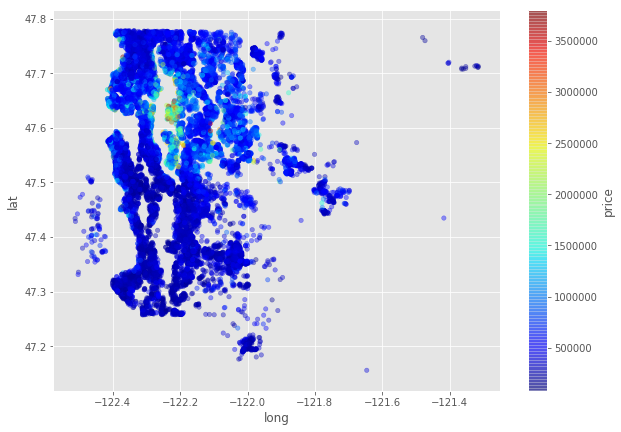

In [60]:
df_pd.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(10,7), c="price", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.savefig('map2.png')

In [61]:
house_df["lat"].describe()

count    21597.000000
mean        47.560093
std          0.138552
min         47.155900
25%         47.471100
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

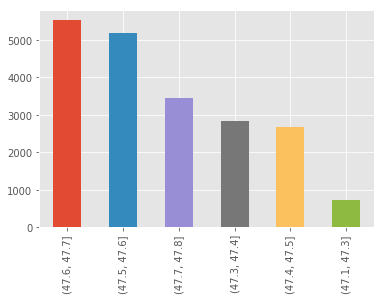

In [62]:
# Create bins for lat
bin = [47.100000, 47.300000, 47.400000, 47.500000, 47.600000, 47.700000, 47.800000]    
# use pd.cut
bin_lat = pd.cut(df_pd["lat"], bin)

# Transform this to ordered categories - using pd.cut 
bin_lat = bin_lat.cat.as_unordered()
bin_lat.head()

# Inspect the result
bin_lat.value_counts().plot(kind='bar')
plt.show()

In [63]:
# One Hot Encode -- lat
lat_dummies = pd.get_dummies(bin_lat, prefix="lat")
lat_dummies.head() 

,"lat_(47.1, 47.3]","lat_(47.3, 47.4]","lat_(47.4, 47.5]","lat_(47.5, 47.6]","lat_(47.6, 47.7]","lat_(47.7, 47.8]"
11,0,0,0,0,1,0
12,0,0,0,0,0,1
13,0,0,0,0,1,0
14,0,0,0,0,1,0
15,0,0,0,1,0,0


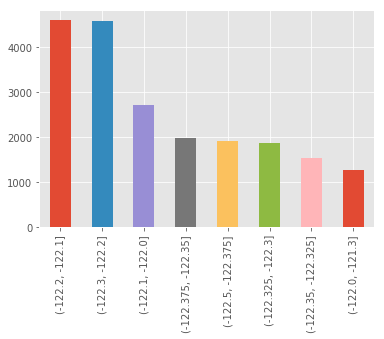

In [64]:
# Create bins for long
bin = [-122.50000, -122.37500, -122.35000, -122.32500, -122.30000, -122.20000, -122.10000, -122.00000,  -121.30000]    
# use pd.cut
bin_long = pd.cut(df_pd["long"], bin)

# Transform this to ordered categories - using pd.cut 
bin_long = bin_long.cat.as_unordered()
bin_long.head()

# Inspect the result
bin_long.value_counts().plot(kind='bar')
plt.show()

In [65]:
# One Hot Encode -- long
long_dummies = pd.get_dummies(bin_long, prefix="long")
long_dummies.head() 

,"long_(-122.5, -122.375]","long_(-122.375, -122.35]","long_(-122.35, -122.325]","long_(-122.325, -122.3]","long_(-122.3, -122.2]","long_(-122.2, -122.1]","long_(-122.1, -122.0]","long_(-122.0, -121.3]"
11,0,0,0,0,1,0,0,0
12,0,0,0,0,1,0,0,0
13,0,0,0,0,0,0,1,0
14,1,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0


In [66]:
df_pd["sqft_basement"].describe()

count    20412.000000
mean       270.179698
std        407.602878
min          0.000000
25%          0.000000
50%          0.000000
75%        530.000000
max       2810.000000
Name: sqft_basement, dtype: float64

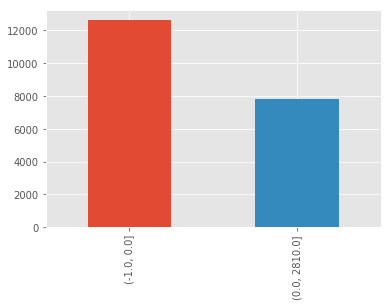

In [67]:
# Create bins for sqft_basement
bin = [-1,0,2810.000000]    
# use pd.cut
bin_sqbase = pd.cut(df_pd["sqft_basement"], bin)

# Transform this to ordered categories - using pd.cut 
bin_sqbase = bin_sqbase.cat.as_unordered()
bin_sqbase.head()

# Inspect the result
bin_sqbase.value_counts().plot(kind='bar')
plt.show()

In [68]:
# One Hot Encode -- sqft_basement
sqbase_dummies = pd.get_dummies(bin_sqbase, prefix="sqbase")
sqbase_dummies.head() 

,"sqbase_(-1.0, 0.0]","sqbase_(0.0, 2810.0]"
11,0,1
12,1,0
13,1,0
14,1,0
15,0,1


In [69]:
df_pd["zipcode"].describe()

count    20412.000000
mean     98078.874682
std         53.666960
min      98001.000000
25%      98033.000000
50%      98070.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

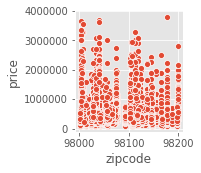

In [70]:
sns.pairplot(df_pd, x_vars="zipcode", y_vars="price");

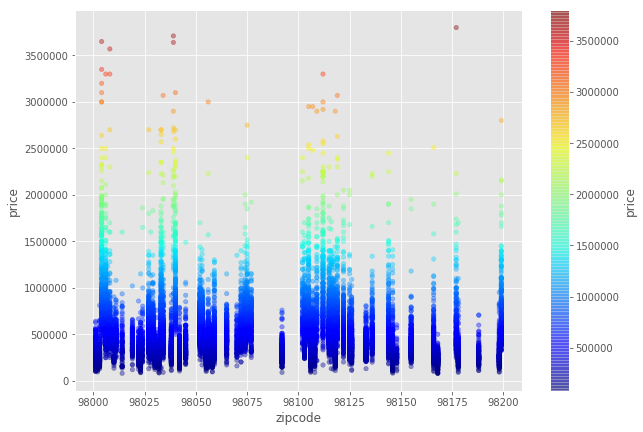

In [71]:
df_pd.plot(kind="scatter", x="zipcode", y="price", alpha=0.4, figsize=(10,7), c="price", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.savefig('map2.png')

In [72]:
df_pd["zipcode"].unique()

array([98115, 98028, 98074, 98107, 98126, 98019, 98103, 98002, 98003,
       98133, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98053, 98023, 98007, 98070, 98148, 98105, 98042,
       98008, 98059, 98166, 98122, 98144, 98004, 98034, 98125, 98038,
       98075, 98116, 98010, 98118, 98136, 98199, 98040, 98032, 98045,
       98102, 98077, 98198, 98108, 98178, 98168, 98177, 98065, 98029,
       98006, 98109, 98022, 98146, 98033, 98155, 98024, 98011, 98031,
       98106, 98072, 98188, 98005, 98014, 98055, 98039], dtype=int64)

In [73]:
df_pd["zipcode"].value_counts().head()

98103    578
98115    572
98052    555
98038    544
98117    544
Name: zipcode, dtype: int64

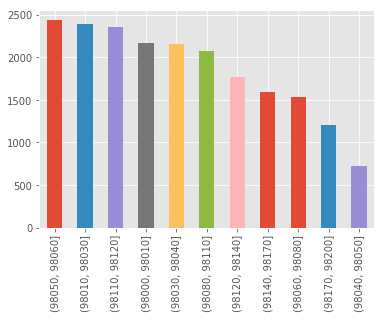

In [74]:
# Create bins for zipcode
bin = [98000, 98010, 98030, 98040, 98050, 98060, 98080, 98110, 98120, 98140, 98170, 98200]    
# use pd.cut
bin_zipcode = pd.cut(df_pd["zipcode"], bin)

# Transform this to ordered categories - using pd.cut 
bin_zipcode = bin_zipcode.cat.as_unordered()
bin_zipcode.head()

# Inspect the result
bin_zipcode.value_counts().plot(kind='bar')
plt.show()

In [75]:
zip_dummies = pd.get_dummies(bin_zipcode, prefix="zip")
zip_dummies.head() 

,"zip_(98000, 98010]","zip_(98010, 98030]","zip_(98030, 98040]","zip_(98040, 98050]","zip_(98050, 98060]","zip_(98060, 98080]","zip_(98080, 98110]","zip_(98110, 98120]","zip_(98120, 98140]","zip_(98140, 98170]","zip_(98170, 98200]"
11,0,0,0,0,0,0,0,1,0,0,0
12,0,1,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,1,0,0,0,0,0
14,0,0,0,0,0,0,1,0,0,0,0
15,0,0,0,0,0,0,0,0,1,0,0


In [76]:
zip_all_dummies = pd.get_dummies(df_pd["zipcode"], prefix="zipAll", drop_first=True)
zip_all_dummies.head() 

,zipAll_98002,zipAll_98003,zipAll_98004,zipAll_98005,zipAll_98006,zipAll_98007,zipAll_98008,zipAll_98010,zipAll_98011,zipAll_98014,...,zipAll_98146,zipAll_98148,zipAll_98155,zipAll_98166,zipAll_98168,zipAll_98177,zipAll_98178,zipAll_98188,zipAll_98198,zipAll_98199
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


__Observation:__
- Created bin for each zipcode -- After stepwise - R2/R2adj = .87 (m/s); Condition = 7-9; R2/R2adj(math) = .4633

In [77]:
df_pd["yr_renovated"].describe()  

count    20412.000000
mean        67.074270
std        359.698048
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [78]:
df_pd["yr_renovated"].unique()

array([   0., 2002., 1991., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 2004., 1986.,
       2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979., 1997.,
       1950., 1969., 1948., 2009., 2015., 1989., 1974., 2008., 1968.,
       2012., 1951., 1962., 1953., 1993., 1955., 1996., 1982., 1963.,
       1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959., 1960.,
       1956., 1967., 1965., 1934., 1972., 1944., 1958.])

In [79]:
df_pd["yr_renovated"].value_counts().head()

0.0       19726
2014.0       72
2013.0       29
2005.0       28
2003.0       27
Name: yr_renovated, dtype: int64

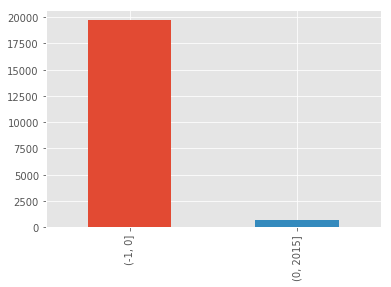

In [80]:
# Create bins for yr_renovated
bin = [-1, 0, 2015]    
# use pd.cut
bin_yr_renov = pd.cut(df_pd["yr_renovated"], bin)

# Transform this to ordered categories - using pd.cut 
bin_yr_renov = bin_yr_renov.cat.as_unordered()
bin_yr_renov.head()

# Inspect the result
bin_yr_renov.value_counts().plot(kind='bar')
plt.show()

In [81]:
yr_renov_dummies = pd.get_dummies(bin_yr_renov, prefix="yr_renov")
yr_renov_dummies.head() 

,"yr_renov_(-1, 0]","yr_renov_(0, 2015]"
11,1,0
12,1,0
13,1,0
14,1,0
15,1,0


In [82]:
df_pd["yr_built"].describe()

count    20412.000000
mean      1970.386831
std         29.456840
min       1900.000000
25%       1951.000000
50%       1973.000000
75%       1996.000000
max       2015.000000
Name: yr_built, dtype: float64

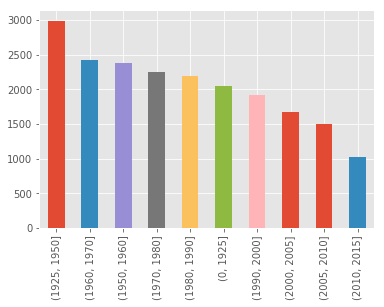

In [83]:
# Create bins for yr_renovated
bin = [0,1925,1950,1960,1970,1980,1990,2000,2005,2010, 2015]    
# use pd.cut
bin_yr_built = pd.cut(df_pd["yr_built"], bin)

# Transform this to ordered categories - using pd.cut 
bin_yr_built = bin_yr_built.cat.as_unordered()
bin_yr_built.head()

# Inspect the result
bin_yr_built.value_counts().plot(kind='bar')
plt.show()

In [84]:
yr_built_dummies = pd.get_dummies(bin_yr_built, prefix="yr_built")
yr_built_dummies.head() 

,"yr_built_(0, 1925]","yr_built_(1925, 1950]","yr_built_(1950, 1960]","yr_built_(1960, 1970]","yr_built_(1970, 1980]","yr_built_(1980, 1990]","yr_built_(1990, 2000]","yr_built_(2000, 2005]","yr_built_(2005, 2010]","yr_built_(2010, 2015]"
11,0,1,0,0,0,0,0,0,0,0
12,0,1,0,0,0,0,0,0,0,0
13,0,0,0,0,1,0,0,0,0,0
14,1,0,0,0,0,0,0,0,0,0
15,0,0,0,0,1,0,0,0,0,0


In [85]:
# Concatenate new dummy columns to the dataframe (df_pd)   

df_pd = pd.concat([df_pd, wf_dummies], axis=1)  
df_pd = pd.concat([df_pd, grad_dummies], axis=1)
df_pd = pd.concat([df_pd, cond_dummies], axis=1)
df_pd = pd.concat([df_pd, yr_built_dummies], axis=1)
df_pd = pd.concat([df_pd, yr_renov_dummies], axis=1)
df_pd = pd.concat([df_pd, view_dummies], axis=1)
df_pd = pd.concat([df_pd, sqbase_dummies], axis=1)
df_pd = pd.concat([df_pd, lat_dummies], axis=1)
df_pd = pd.concat([df_pd, long_dummies], axis=1)
df_pd = pd.concat([df_pd, zip_dummies], axis=1)
df_pd = pd.concat([df_pd, zip_all_dummies], axis=1)

df_pd.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipAll_98146,zipAll_98148,zipAll_98155,zipAll_98166,zipAll_98168,zipAll_98177,zipAll_98178,zipAll_98188,zipAll_98198,zipAll_98199
11,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,4,7,...,0,0,0,0,0,0,0,0,0,0
12,310000.0,3,1.00,1430,19901,1.5,0.0,0.0,4,7,...,0,0,0,0,0,0,0,0,0,0
13,400000.0,3,1.75,1370,9680,1.0,0.0,0.0,4,7,...,0,0,0,0,0,0,0,0,0,0
14,530000.0,5,2.00,1810,4850,1.5,0.0,0.0,3,7,...,0,0,0,0,0,0,0,0,0,0
15,650000.0,4,3.00,2950,5000,2.0,0.0,3.0,3,9,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df_pd.shape

(20412, 146)

In [87]:
# Drop the orignal features
df_pd = df_pd.drop(["yr_built", "waterfront","condition", "grade", "yr_renovated", 
                    "zipcode","lat","long", "view", "sqft_basement"], axis=1)
df_pd.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15,wf_1.0,...,zipAll_98146,zipAll_98148,zipAll_98155,zipAll_98166,zipAll_98168,zipAll_98177,zipAll_98178,zipAll_98188,zipAll_98198,zipAll_98199
11,468000.0,2,1.00,1160,6000,1.0,860,1330,6000,0,...,0,0,0,0,0,0,0,0,0,0
12,310000.0,3,1.00,1430,19901,1.5,1430,1780,12697,0,...,0,0,0,0,0,0,0,0,0,0
13,400000.0,3,1.75,1370,9680,1.0,1370,1370,10208,0,...,0,0,0,0,0,0,0,0,0,0
14,530000.0,5,2.00,1810,4850,1.5,1810,1360,4850,0,...,0,0,0,0,0,0,0,0,0,0
15,650000.0,4,3.00,2950,5000,2.0,1980,2140,4000,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
df_pd.shape

(20412, 136)

#### Check for Multicollinearity of Features

In [89]:
# Create dataframe for Continuous Data
df_X_cont = df_pd.iloc[:,1:9] # All rows for specific columns
df_X_cont.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15
11,2,1.00,1160,6000,1.0,860,1330,6000
12,3,1.00,1430,19901,1.5,1430,1780,12697
13,3,1.75,1370,9680,1.0,1370,1370,10208
14,5,2.00,1810,4850,1.5,1810,1360,4850
15,4,3.00,2950,5000,2.0,1980,2140,4000


In [90]:
df_X_cont.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15
bedrooms,1.000000,0.508273,0.600372,0.051055,0.180434,0.489947,0.403074,0.055869
bathrooms,0.508273,1.000000,0.737599,0.077135,0.513949,0.661455,0.552303,0.084432
sqft_living,0.600372,0.737599,1.000000,0.173826,0.366314,0.865373,0.749561,0.190927
sqft_lot,0.051055,0.077135,0.173826,1.000000,-0.038237,0.174707,0.156746,0.733293
floors,0.180434,0.513949,0.366314,-0.038237,1.000000,0.539326,0.282867,-0.044079
sqft_above,0.489947,0.661455,0.865373,0.174707,0.539326,1.000000,0.720929,0.191793
sqft_living15,0.403074,0.552303,0.749561,0.156746,0.282867,0.720929,1.000000,0.204173
sqft_lot15,0.055869,0.084432,0.190927,0.733293,-0.044079,0.191793,0.204173,1.000000


In [91]:
# 0.7-0.8 or higher is considered a high correlation
abs(df_X_cont.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False
bathrooms,False,True,False,False,False,False,False,False
sqft_living,False,False,True,False,False,True,False,False
sqft_lot,False,False,False,True,False,False,False,False
floors,False,False,False,False,True,False,False,False
sqft_above,False,False,True,False,False,True,False,False
sqft_living15,False,False,False,False,False,False,True,False
sqft_lot15,False,False,False,False,False,False,False,True


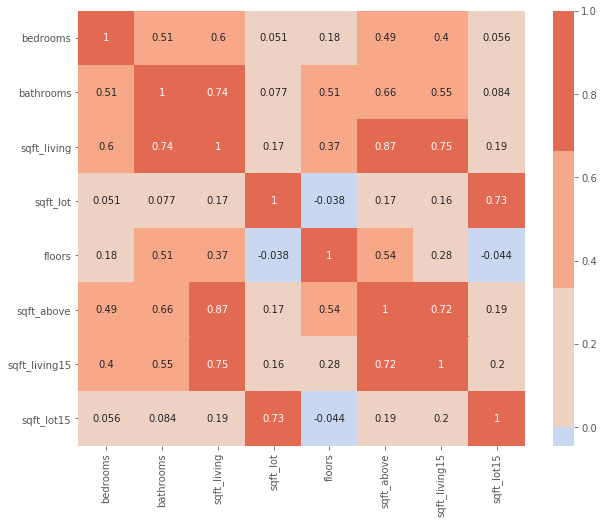

In [92]:
# Plotting the correlation of the continuous data for Feature columns
plt.figure(figsize = (10,8))
sns.heatmap(df_X_cont.corr(), center=0, annot = True, cmap = sns.color_palette("coolwarm"));

__Observation:__
- The following columns indicate a high correlation with __sqft_living__:
    - sqft_lot15 
    - sqft_above
    - sqft_living15

In [93]:
# Drop columns from dataframe that exhibits a high correlation with sqft_living
df = df_pd.drop(["sqft_above", "sqft_living15", "sqft_lot15"],axis=1) 

### Building the Multiple Linear Regression Model
#### Feature Engineering

Here are the OLS assumptions:
- Linearity: A linear relationship exists between the dependent and predictor variables. If no linear relationship exists, linear regression isn't the correct model to explain our data.
- No multicollinearity: Predictor variables are not collinear, i.e., they aren't highly correlated. If the predictors are highly correlated, try removing one or more of them. Since additional predictors are supplying redundant information, removing them shouldn't drastically reduce the Adj. R-squared (see below).
- Zero conditional mean: The average of the distances (or residuals) between the observations and the trend line is zero. Some will be positive, others negative, but they won't be biased toward a set of values.
- Homoskedasticity: The certainty (or uncertainty) of our dependent variable is equal across all values of a predictor variable; that is, there is no pattern in the residuals. In statistical jargon, the variance is constant.
- No autocorrelation (serial correlation): Autocorrelation is when a variable is correlated with itself across observations. For example, a stock price might be serially correlated if one day's stock price impacts the next day's stock price.

In [94]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'wf_1.0', 'grad_4', 'grad_5', 'grad_6',
       ...
       'zipAll_98146', 'zipAll_98148', 'zipAll_98155', 'zipAll_98166',
       'zipAll_98168', 'zipAll_98177', 'zipAll_98178', 'zipAll_98188',
       'zipAll_98198', 'zipAll_98199'],
      dtype='object', length=133)

In [95]:
# Continuous Data for features
continuous_features = df.iloc[:, 1:6] # All rows for these specific columns
continuous_features.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors
11,2,1.00,1160,6000,1.0
12,3,1.00,1430,19901,1.5
13,3,1.75,1370,9680,1.0
14,5,2.00,1810,4850,1.5
15,4,3.00,2950,5000,2.0


In [96]:
# Catagory Data for features
category_features = df.iloc[:, 6:] # All rows for these specific columns
category_features.head()

,wf_1.0,grad_4,grad_5,grad_6,grad_7,grad_8,grad_9,grad_10,grad_11,grad_12,...,zipAll_98146,zipAll_98148,zipAll_98155,zipAll_98166,zipAll_98168,zipAll_98177,zipAll_98178,zipAll_98188,zipAll_98198,zipAll_98199
11,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# Data OLS: Includes continuous and categorical features to generate OLS Regression results
data_ols = pd.concat([continuous_features, long_dummies, lat_dummies, sqbase_dummies, view_dummies,  wf_dummies, grad_dummies, cond_dummies, yr_built_dummies, yr_renov_dummies, zip_dummies], axis= 1)
data_ols.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,"long_(-122.5, -122.375]","long_(-122.375, -122.35]","long_(-122.35, -122.325]","long_(-122.325, -122.3]","long_(-122.3, -122.2]",...,"zip_(98010, 98030]","zip_(98030, 98040]","zip_(98040, 98050]","zip_(98050, 98060]","zip_(98060, 98080]","zip_(98080, 98110]","zip_(98110, 98120]","zip_(98120, 98140]","zip_(98140, 98170]","zip_(98170, 98200]"
11,2,1.00,1160,6000,1.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
12,3,1.00,1430,19901,1.5,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
13,3,1.75,1370,9680,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14,5,2.00,1810,4850,1.5,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15,4,3.00,2950,5000,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [98]:
# Generating Model Summary on All Features --- Before Transformations  ----
predictors_model_a = data_ols
predictors_int = sm.add_constant(predictors_model_a)
model = sm.OLS(df['price'],predictors_int).fit()
print(f"MODEL A: Model Summary: no transformations")
model.summary()

MODEL A: Model Summary: no transformations


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     1185.
Date:                Sat, 03 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:43:21   Log-Likelihood:            -2.7201e+05
No. Observations:               20412   AIC:                         5.441e+05
Df Residuals:                   20353   BIC:                         5.446e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     3.794e+04   7.03e+04      0.539      0.590   -9.99e+04    1.76e+05
bedrooms                 -1.152e+04   1628.677     -7.076      0.000   -1.47e+04   -8331.580
bathrooms                 2.947e+04   2657.025     11.091      0.000    2.43e+04    3.47e+04
sqft_living                142.9187      2.738     52.202      0.000     137.552     148.285
sqft_lot                     0.1498      0.049      3.030      0.002       0.053       0.247
floors                   -1.675e+04   3129.839     -5.353      0.000   -2.29e+04   -1.06e+04
long_(-122.5, -122.375]   1.469e+05   6.75e+04      2.177      0.029    1.46e+04    2.79e+05
long_(-122.375, -122.35]  1.339e+05   6.75e+04      1.984      0.047    1610.025    2.66e+05
long_(-122.35, -122.325]  1.182e+05   6.75e+04      1.751      0.080   -1.41e+04    2.51e+05
long_(-122.325, -122.3]   1.311e+05   6.75e+04      1.943      0.052   -1171.615    2.63e+05
long_(-122.3, -122.2]     1.567e+05   6.74e+04      2.324      0.020    2.45e+04    2.89e+05
long_(-122.2, -122.1]      1.01e+05   6.74e+04      1.499      0.134   -3.11e+04    2.33e+05
long_(-122.1, -122.0]      1.14e+05   6.74e+04      1.693      0.090    -1.8e+04    2.46e+05
long_(-122.0, -121.3]     8.087e+04   6.75e+04      1.199      0.231   -5.13e+04    2.13e+05
lat_(47.1, 47.3]         -1.447e+05   1.26e+04    -11.443      0.000   -1.69e+05    -1.2e+05
lat_(47.3, 47.4]         -1.414e+05   1.21e+04    -11.672      0.000   -1.65e+05   -1.18e+05
lat_(47.4, 47.5]           -3.3e+04   1.22e+04     -2.710      0.007   -5.69e+04   -9134.445
lat_(47.5, 47.6]          8.004e+04    1.2e+04      6.660      0.000    5.65e+04    1.04e+05
lat_(47.6, 47.7]          2.155e+05    1.2e+04     17.888      0.000    1.92e+05    2.39e+05
lat_(47.7, 47.8]          6.144e+04   1.21e+04      5.079      0.000    3.77e+04    8.51e+04
sqbase_(-1.0, 0.0]        3.257e+04   3.52e+04      0.925      0.355   -3.64e+04    1.02e+05
sqbase_(0.0, 2810.0]      5373.2959   3.52e+04      0.153      0.879   -6.36e+04    7.44e+04
view_1.0                  1.052e+05   8724.321     12.061      0.000    8.81e+04    1.22e+05
view_2.0                  7.432e+04   5393.310     13.780      0.000    6.37e+04    8.49e+04
view_3.0                  1.487e+05   7592.779     19.581      0.000    1.34e+05    1.64e+05
view_4.0                  3.022e+05   1.21e+04     24.912      0.000    2.78e+05    3.26e+05
wf_1.0                    4.118e+05   1.78e+04     23.091      0.000    3.77e+05    4.47e+05
grad_4                   -2.016e+05   1.51e+05     -1.331      0.183   -4.99e+05    9.53e+04
grad_5                    -2.16e+05   1.49e+05     -1.449      0.147   -5.08e+05    7.62e+04
grad_6                   -1.984e+05   1.49e+05     -1.333      0.183    -4.9e+05    9.33e+04
grad_7        

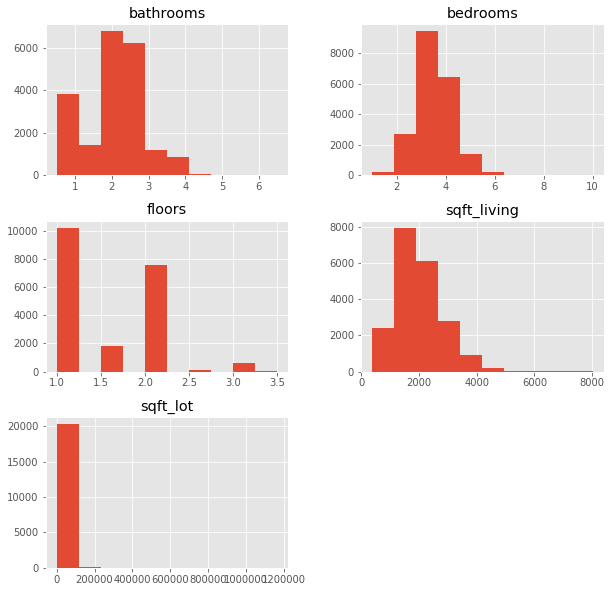

In [99]:
# Checking distributions of Continuous
continuous_features.hist(figsize=(10,10));

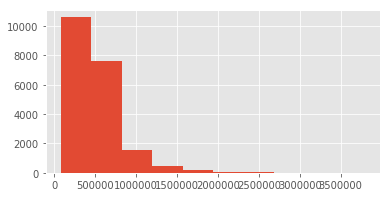

In [100]:
# Checking distributions of Target
df["price"].hist(figsize=(6,3));

__Observation:__
- Data is skewed mostly to the right on the features and target listed above.

## Feature Scaling and Normalization

###  Feature Normalization

In [101]:
# Transforming Non-Normal Features and Target - Using Log Transformations 

In [102]:
data_norm = pd.DataFrame([])

# Log transformation - Continuous columns
data_norm["logbedrms"]  = np.log(df["bedrooms"])
data_norm["logsqliv"]   = np.log(df["sqft_living"])
data_norm["logsqlot"]   = np.log(df["sqft_lot"])
data_norm["logbathrms"] = np.log(df["bathrooms"])
data_norm["logfl"]      = np.log(df["floors"])


# Log transformation - Target column
data_norm["logprice"]      = np.log(df["price"])

    logbedrms  logsqliv  logsqlot  logbathrms     logfl   logprice
11   0.693147  7.056175  8.699515    0.000000  0.000000  13.056224
12   1.098612  7.265430  9.898525    0.000000  0.405465  12.644328
13   1.098612  7.222566  9.177817    0.559616  0.000000  12.899220
14   1.609438  7.501082  8.486734    0.693147  0.405465  13.180632
15   1.386294  7.989560  8.517193    1.098612  0.693147  13.384728


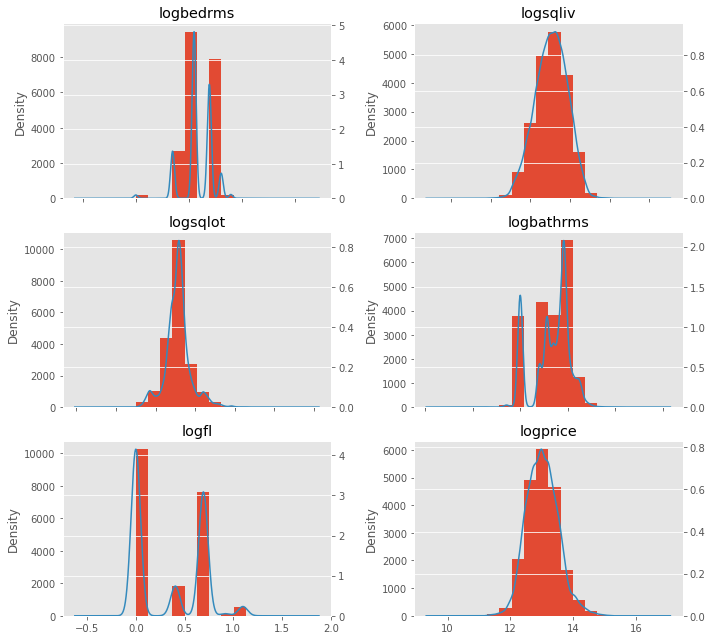

In [103]:
# View hist and kde on the variables, checking for Linearity Assumption.

print(data_norm.head())
k = len(data_norm.columns)  # Number of columns/variable names
n = 2                       # Display 2 columns in the figure
m = (k - 1) // n + 1        # Display each column/variable as a row in the # columns specified
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(data_norm.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)
fig.tight_layout()

__Observation:__
- Log transforms improved the skewness on the data above.
- The following features were not able to be transformed using log transformations:
    - ERROR -- logbase,logview = -inf values 
        - data_norm["logbase"]    = np.log(df["sqft_basement"])
        - data_norm["logview"]    = np.log(df["view"])

In [104]:
# Data OLS: Includes log transf and categorical features to generate OLS Regression results
data_ols = pd.concat([data_norm, long_dummies, lat_dummies, sqbase_dummies, view_dummies,  wf_dummies, grad_dummies, cond_dummies, yr_built_dummies, yr_renov_dummies, zip_dummies], axis= 1)
data_ols.head()

,logbedrms,logsqliv,logsqlot,logbathrms,logfl,logprice,"long_(-122.5, -122.375]","long_(-122.375, -122.35]","long_(-122.35, -122.325]","long_(-122.325, -122.3]",...,"zip_(98010, 98030]","zip_(98030, 98040]","zip_(98040, 98050]","zip_(98050, 98060]","zip_(98060, 98080]","zip_(98080, 98110]","zip_(98110, 98120]","zip_(98120, 98140]","zip_(98140, 98170]","zip_(98170, 98200]"
11,0.693147,7.056175,8.699515,0.000000,0.000000,13.056224,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12,1.098612,7.265430,9.898525,0.000000,0.405465,12.644328,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13,1.098612,7.222566,9.177817,0.559616,0.000000,12.899220,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14,1.609438,7.501082,8.486734,0.693147,0.405465,13.180632,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15,1.386294,7.989560,8.517193,1.098612,0.693147,13.384728,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [105]:
# Run Model Summary, after applying log transformations

predictors_model_b = data_ols.drop("logprice", axis = 1)
predictors_int = sm.add_constant(predictors_model_b)
model = sm.OLS(data_norm["logprice"],predictors_int).fit()
print(f"MODEL B: Model Summary: log transformations  ")
model.summary()

MODEL B: Model Summary: log transformations  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1692.
Date:                Sat, 03 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:43:35   Log-Likelihood:                 3005.6
No. Observations:               20412   AIC:                            -5893.
Df Residuals:                   20353   BIC:                            -5426.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.9481      0.101     38.987      0.000       3.750       4.147
logbedrms                   -0.0423      0.007     -5.723      0.000      -0.057      -0.028
logsqliv                     0.4450      0.008     53.677      0.000       0.429       0.461
logsqlot                     0.0590      0.003     20.673      0.000       0.053       0.065
logbathrms                   0.0651      0.007      9.128      0.000       0.051       0.079
logfl                       -0.0230      0.007     -3.270      0.001      -0.037      -0.009
long_(-122.5, -122.375]     -0.0575      0.095     -0.605      0.545      -0.244       0.129
long_(-122.375, -122.35]    -0.1267      0.095     -1.333      0.183      -0.313       0.060
long_(-122.35, -122.325]    -0.1544      0.095     -1.623      0.105      -0.341       0.032
long_(-122.325, -122.3]     -0.1392      0.095     -1.464      0.143      -0.326       0.047
long_(-122.3, -122.2]       -0.1322      0.095     -1.392      0.164      -0.318       0.054
long_(-122.2, -122.1]       -0.1509      0.095     -1.589      0.112      -0.337       0.035
long_(-122.1, -122.0]       -0.1164      0.095     -1.227      0.220      -0.302       0.070
long_(-122.0, -121.3]       -0.1970      0.095     -2.073      0.038      -0.383      -0.011
lat_(47.1, 47.3]             0.2936      0.018     16.108      0.000       0.258       0.329
lat_(47.3, 47.4]             0.3330      0.017     19.075      0.000       0.299       0.367
lat_(47.4, 47.5]             0.5653      0.018     32.272      0.000       0.531       0.600
lat_(47.5, 47.6]             0.8459      0.017     49.123      0.000       0.812       0.880
lat_(47.6, 47.7]             1.0748      0.017     62.422      0.000       1.041       1.109
lat_(47.7, 47.8]             0.8355      0.017     47.931      0.000       0.801       0.870
sqbase_(-1.0, 0.0]           1.9872      0.051     39.289      0.000       1.888       2.086
sqbase_(0.0, 2810.0]         1.9609      0.051     38.627      0.000       1.861       2.060
view_1.0                     0.1584      0.012     12.893      0.000       0.134       0.182
view_2.0                     0.1310      0.008     17.263      0.000       0.116       0.146
view_3.0                     0.1977      0.011     18.508      0.000       0.177       0.219
view_4.0                     0.3340      0.017     19.548      0.000       0.300       0.367
wf_1.0                       0.4000      0.025     15.915      0.000       0.351       0.449
grad_4                      -0.6855      0.213     -3.213      0.001      -1.104      -0.267
grad_5                      -0.6862      0.210     -3.268      0.001      -1.098      -0.275
grad_6                      -0.5855      0.210     -2.793      0.005      -0.996      -0.175
grad_7        

### Feature Scaling

When performing min-max scaling, you can transform x to get the transformed $x'$ by using the formula:

$$x' = \dfrac{x - \min(x)}{\max(x)-\min(x)}$$

This way of scaling brings values between 0 and 1

    scalebedrms  scalesqliv  scalesqlot  scalebathrms   scalefl   logprice
11     0.301030    0.371457    0.317036      0.270238  0.000000  13.056224
12     0.477121    0.439481    0.472464      0.270238  0.323657  12.644328
13     0.477121    0.425547    0.379038      0.488416  0.000000  12.899220
14     0.698970    0.516086    0.289453      0.540476  0.323657  13.180632
15     0.602060    0.674879    0.293401      0.698555  0.553295  13.384728


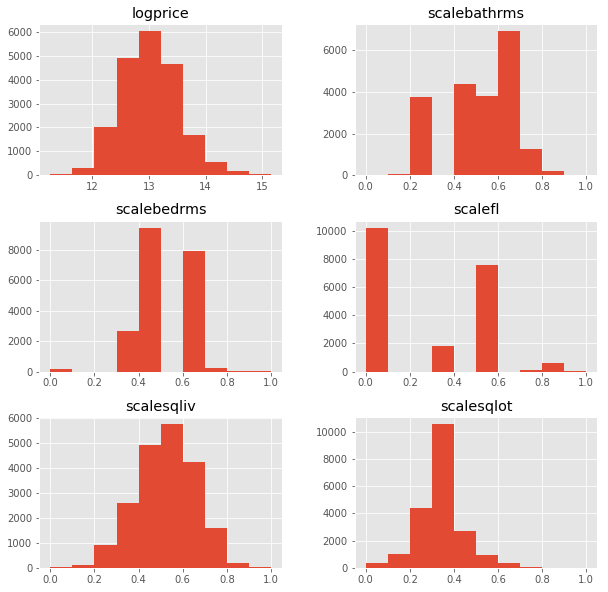

In [106]:
# Feature Scaling   

data_scale = pd.DataFrame([])

# Scaled transformation
data_scale["scalebedrms"]  = (data_norm["logbedrms"]  - np.min(data_norm["logbedrms"]))  / (np.max(data_norm["logbedrms"])  - np.min(data_norm["logbedrms"]))
data_scale["scalesqliv"]   = (data_norm["logsqliv"]   - np.min(data_norm["logsqliv"]))   / (np.max(data_norm["logsqliv"])   - np.min(data_norm["logsqliv"]))
data_scale["scalesqlot"]   = (data_norm["logsqlot"]   - np.min(data_norm["logsqlot"]))   / (np.max(data_norm["logsqlot"])   - np.min(data_norm["logsqlot"]))
data_scale["scalebathrms"] = (data_norm["logbathrms"] - np.min(data_norm["logbathrms"])) / (np.max(data_norm["logbathrms"]) - np.min(data_norm["logbathrms"]))
data_scale["scalefl"]      = (data_norm["logfl"]      - np.min(data_norm["logfl"]))      / (np.max(data_norm["logfl"])      - np.min(data_norm["logfl"]))

# Scale the target, so that it is on the same scale as IV/features
data_scale["logprice"]     = data_norm["logprice"]

print(data_scale.head())
data_scale.hist(figsize=(10,10));

In [107]:
# Data OLS: Includes scaled tranformations and categorical features to generate OLS Regression results
# data_ols = pd.concat([data_norm, df["long"], df["sqft_basement"], wf_dummies, view_dummies, grad_dummies, cond_dummies, yr_built_dummies, yr_renov_dummies], axis= 1)
data_ols = pd.concat([data_scale, view_dummies, long_dummies, lat_dummies, sqbase_dummies,  wf_dummies, grad_dummies, cond_dummies, yr_built_dummies, yr_renov_dummies, zip_dummies], axis= 1)
data_ols.head()

,scalebedrms,scalesqliv,scalesqlot,scalebathrms,scalefl,logprice,view_1.0,view_2.0,view_3.0,view_4.0,...,"zip_(98010, 98030]","zip_(98030, 98040]","zip_(98040, 98050]","zip_(98050, 98060]","zip_(98060, 98080]","zip_(98080, 98110]","zip_(98110, 98120]","zip_(98120, 98140]","zip_(98140, 98170]","zip_(98170, 98200]"
11,0.301030,0.371457,0.317036,0.270238,0.000000,13.056224,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12,0.477121,0.439481,0.472464,0.270238,0.323657,12.644328,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13,0.477121,0.425547,0.379038,0.488416,0.000000,12.899220,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14,0.698970,0.516086,0.289453,0.540476,0.323657,13.180632,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15,0.602060,0.674879,0.293401,0.698555,0.553295,13.384728,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [108]:
# Model C Summary
predictors_model_c = data_ols.drop("logprice", axis = 1)
predictors_int = sm.add_constant(predictors_model_c)
model = sm.OLS(data_norm["logprice"],predictors_int).fit()
print(f"MODEL C: Model Summary: scaled transformations  ")
model.summary()

MODEL C: Model Summary: scaled transformations  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1573.
Date:                Sat, 03 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:43:37   Log-Likelihood:                 2390.6
No. Observations:               20412   AIC:                            -4663.
Df Residuals:                   20353   BIC:                            -4196.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -3.834e+10    1.4e+11     -0.275      0.783   -3.12e+11    2.35e+11
scalebedrms                 -0.0974      0.018     -5.549      0.000      -0.132      -0.063
scalesqliv                   1.3688      0.026     52.069      0.000       1.317       1.420
scalesqlot                   0.4552      0.023     20.057      0.000       0.411       0.500
scalebathrms                 0.1669      0.019      8.857      0.000       0.130       0.204
scalefl                     -0.0288      0.009     -3.173      0.002      -0.047      -0.011
view_1.0                     0.1584      0.013     12.512      0.000       0.134       0.183
view_2.0                     0.1310      0.008     16.751      0.000       0.116       0.146
view_3.0                     0.1977      0.011     17.958      0.000       0.176       0.219
view_4.0                     0.3340      0.018     18.967      0.000       0.299       0.368
long_(-122.5, -122.375]     -0.0577      0.098     -0.589      0.556      -0.250       0.134
long_(-122.375, -122.35]    -0.1269      0.098     -1.295      0.195      -0.319       0.065
long_(-122.35, -122.325]    -0.1546      0.098     -1.577      0.115      -0.347       0.038
long_(-122.325, -122.3]     -0.1394      0.098     -1.422      0.155      -0.332       0.053
long_(-122.3, -122.2]       -0.1323      0.098     -1.352      0.176      -0.324       0.060
long_(-122.2, -122.1]       -0.1511      0.098     -1.544      0.123      -0.343       0.041
long_(-122.1, -122.0]       -0.1166      0.098     -1.192      0.233      -0.308       0.075
long_(-122.0, -121.3]       -0.1972      0.098     -2.013      0.044      -0.389      -0.005
lat_(47.1, 47.3]          -1.28e+10   4.66e+10     -0.275      0.783   -1.04e+11    7.85e+10
lat_(47.3, 47.4]          -1.28e+10   4.66e+10     -0.275      0.783   -1.04e+11    7.85e+10
lat_(47.4, 47.5]          -1.28e+10   4.66e+10     -0.275      0.783   -1.04e+11    7.85e+10
lat_(47.5, 47.6]          -1.28e+10   4.66e+10     -0.275      0.783   -1.04e+11    7.85e+10
lat_(47.6, 47.7]          -1.28e+10   4.66e+10     -0.275      0.783   -1.04e+11    7.85e+10
lat_(47.7, 47.8]          -1.28e+10   4.66e+10     -0.275      0.783   -1.04e+11    7.85e+10
sqbase_(-1.0, 0.0]       -4.623e+10   1.68e+11     -0.275      0.783   -3.76e+11    2.83e+11
sqbase_(0.0, 2810.0]     -4.623e+10   1.68e+11     -0.275      0.783   -3.76e+11    2.83e+11
wf_1.0                       0.3999      0.026     15.441      0.000       0.349       0.451
grad_4                      -0.6858      0.220     -3.119      0.002      -1.117      -0.255
grad_5                      -0.6866      0.216     -3.173      0.002      -1.111      -0.262
grad_6                      -0.5859      0.216     -2.711      0.007      -1.009      -0.162
grad_7        

__Stepwise Function__

In [109]:
# Using Stepwise to detemine which features to include in the models with p-value <.05

import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

### Model Fit - Identify the "Best Fit Model"

#### MODEL A

In [110]:
# Evaluate model(s) to identify "Best Fit Regression Line"
y = df["price"]
predictors = predictors_model_a

In [111]:
# Using Stepwise to detemine which features to include in the models with p-value <.05
result = stepwise_selection(predictors, df["price"]) #, verbose = True)
print('Resulting Features:')
print(result)
X_feature_pvalue = result

Add  bathrooms                      with p-value 0.0
Add  lat_(47.3, 47.4]               with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  lat_(47.4, 47.5]               with p-value 0.0
Drop bathrooms                      with p-value 0.531163


C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  view_4.0                       with p-value 0.0
Add  lat_(47.6, 47.7]               with p-value 0.0
Add  grad_11                        with p-value 1.86675e-213
Add  grad_10                        with p-value 3.97917e-190
Add  lat_(47.1, 47.3]               with p-value 4.7161e-184
Add  grad_12                        with p-value 6.66995e-147
Add  grad_9                         with p-value 2.03216e-149
Add  cond_3                         with p-value 1.89517e-115
Add  long_(-122.3, -122.2]          with p-value 8.51174e-113
Add  wf_1.0                         with p-value 9.66721e-106
Add  view_3.0                       with p-value 3.34971e-87
Add  grad_8                         with p-value 5.42194e-76
Add  zip_(98060, 98080]             with p-value 1.28324e-79
Add  zip_(98050, 98060]             with p-value 1.59194e-63
Add  grad_13                        with p-value 5.17131e-58
Add  yr_renov_(0, 2015]             with p-value 1.28286e-56
Add  view_2.0                    

In [112]:
import statsmodels.api as sm
X_fin_A = predictors[X_feature_pvalue]
X_with_intercept = sm.add_constant(X_fin_A)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     1493.
Date:                Sat, 03 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:45:22   Log-Likelihood:            -2.7202e+05
No. Observations:               20412   AIC:                         5.441e+05
Df Residuals:                   20365   BIC:                         5.445e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.319e+04   3760.488      3.509      0.000    5822.966    2.06e+04
lat_(47.3, 47.4]          -1.44e+05   3034.661    -47.455      0.000    -1.5e+05   -1.38e+05
sqft_living                143.6612      2.715     52.911      0.000     138.339     148.983
lat_(47.4, 47.5]         -3.813e+04   3317.804    -11.494      0.000   -4.46e+04   -3.16e+04
view_4.0                   3.01e+05   1.21e+04     24.868      0.000    2.77e+05    3.25e+05
lat_(47.6, 47.7]          2.109e+05   2595.505     81.274      0.000    2.06e+05    2.16e+05
grad_11                   6.123e+05   1.21e+04     50.401      0.000    5.88e+05    6.36e+05
grad_10                   3.572e+05   7947.026     44.942      0.000    3.42e+05    3.73e+05
lat_(47.1, 47.3]         -1.467e+05   5020.962    -29.209      0.000   -1.57e+05   -1.37e+05
grad_12                   1.032e+06   2.98e+04     34.626      0.000    9.74e+05    1.09e+06
grad_9                     2.09e+05   6140.649     34.042      0.000    1.97e+05    2.21e+05
long_(-122.3, -122.2]     4.017e+04   3584.114     11.208      0.000    3.31e+04    4.72e+04
wf_1.0                     4.09e+05   1.77e+04     23.139      0.000    3.74e+05    4.44e+05
view_3.0                  1.478e+05   7587.622     19.474      0.000    1.33e+05    1.63e+05
grad_8                    1.033e+05   4838.889     21.353      0.000    9.38e+04    1.13e+05
zip_(98060, 98080]       -4.944e+04   4743.760    -10.421      0.000   -5.87e+04   -4.01e+04
zip_(98050, 98060]       -2.283e+04   4613.331     -4.949      0.000   -3.19e+04   -1.38e+04
grad_13                   2.631e+06    1.5e+05     17.590      0.000    2.34e+06    2.92e+06
yr_renov_(0, 2015]        3.711e+04   4274.252      8.683      0.000    2.87e+04    4.55e+04
view_2.0                  7.348e+04   5385.199     13.645      0.000    6.29e+04     8.4e+04
zip_(98000, 98010]        7.874e+04   4394.769     17.916      0.000    7.01e+04    8.74e+04
zip_(98030, 98040]        7.335e+04   4181.403     17.541      0.000    6.52e+04    8.15e+04
view_1.0                  1.043e+05   8718.750     11.962      0.000    8.72e+04    1.21e+05
yr_built_(0, 1925]        8.175e+04   4917.001     16.627      0.000    7.21e+04    9.14e+04
cond_5                    7.346e+04   4179.761     17.574      0.000    6.53e+04    8.16e+04
yr_built_(1925, 1950]     6.336e+04   4408.254     14.372      0.000    5.47e+04     7.2e+04
grad_7                    4.353e+04   3996.356     10.892      0.000    3.57e+04    5.14e+04
zip_(98040, 98050]        6.333e+04   6597.343      9.599      0.000    5.04e+04    7.63e+04
yr_built_(2010, 2015]      3.64e+04   5107.816      7.126      0.000    2.64e+04    4.64e+04
yr_built_(1950, 1960]     3.951e+04   4336.173      9.112      0.000     3.1e+04     4.8e+04
bathrooms     

#### MODEL A: Observations

- R2 (a)	0.771
- R2 adj (a)	0.771
- Prob (F-statistic)	0
- AIC	5.44E+05
- BIC	5.44E+0
- Skewness	1.914
- Kurtosis	18.147
- Cond No.	4.49E+17
- Residual Gaph	Failed
- Homoscedasticity	No - Cone shaped


__Checking for normality, usig Q-Q Plot__

- To check for the normality assumption, you can obtain error terms (residuals) from the model and draw Q-Q Plot against a standard normal distribution as shown below. while the residuals do not seem to match up perfectly with the red line, there seem to be no super clear deviations from the red line. So you can assume that you're OK for the normality assumption.
- You'll verify the normality assumption later by checking the distribution of the residuals after building the model.

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


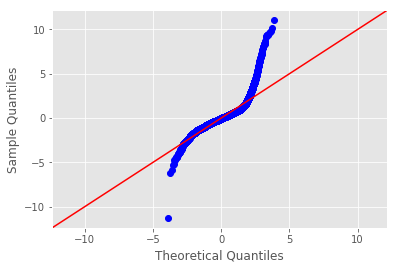

In [113]:
# Q-Q Plot, shows if the residuals are normally distributed.
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

__Observe:__

- Check for normality: There seems to be a clear deviation from the red line. So, the normality assumption failed.
- NOTE: A good normal QQ plot has all of the residuals lying on or close to the red line.

__Graphs (Sample, explaination listed below):__
- The Y and Fitted vs. X graph plots the dependent variable against our predicted values with a confidence interval. The positive relationship shows that price and sqft_living are correlated, i.e., when one variable increases the other increases.

- The Residuals versus sqft_living graph shows our model's errors versus the specified predictor variable. Each dot is an observed value; the line represents the mean of those observed values. 

- The Partial regression plot shows the relationship between price and sqft_living, taking in to account the impact of adding other independent variables on our existing price coefficient. 

- The Component and Component Plus Residual (CCPR) plot is an extension of the partial regression plot, but shows where the trend line would lie after adding the impact of adding our other independent variables on the sqft_living.

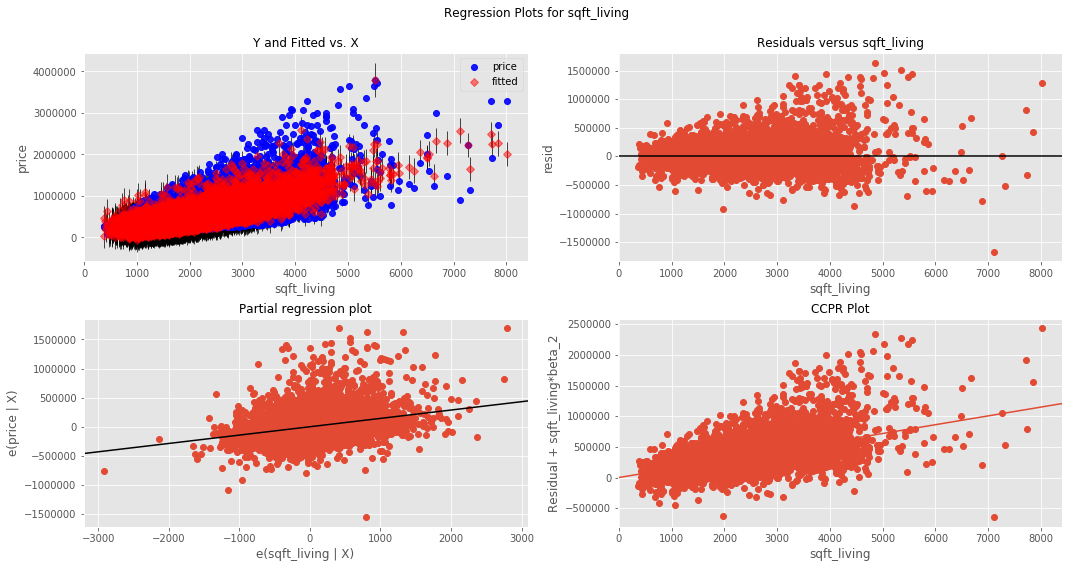

In [114]:
# sqft_living
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living" , fig=fig) 
plt.show()

__Observe:__
- The Residuals versus sqft_living graph: Since there is a CONE-pattern in the distance between the dots and the mean value, the OLS assumption of homoskedasticity fails.    

In [115]:
X_fin_A.columns

Index(['lat_(47.3, 47.4]', 'sqft_living', 'lat_(47.4, 47.5]', 'view_4.0',
       'lat_(47.6, 47.7]', 'grad_11', 'grad_10', 'lat_(47.1, 47.3]', 'grad_12',
       'grad_9', 'long_(-122.3, -122.2]', 'wf_1.0', 'view_3.0', 'grad_8',
       'zip_(98060, 98080]', 'zip_(98050, 98060]', 'grad_13',
       'yr_renov_(0, 2015]', 'view_2.0', 'zip_(98000, 98010]',
       'zip_(98030, 98040]', 'view_1.0', 'yr_built_(0, 1925]', 'cond_5',
       'yr_built_(1925, 1950]', 'grad_7', 'zip_(98040, 98050]',
       'yr_built_(2010, 2015]', 'yr_built_(1950, 1960]', 'bathrooms',
       'long_(-122.5, -122.375]', 'sqbase_(-1.0, 0.0]', 'bedrooms',
       'yr_built_(1960, 1970]', 'zip_(98110, 98120]', 'floors', 'cond_4',
       'lat_(47.5, 47.6]', 'lat_(47.7, 47.8]', 'yr_renov_(-1, 0]',
       'long_(-122.0, -121.3]', 'long_(-122.2, -122.1]',
       'yr_built_(1990, 2000]', 'zip_(98170, 98200]', 'zip_(98140, 98170]',
       'long_(-122.375, -122.35]', 'sqft_lot', 'long_(-122.325, -122.3]',
       'sqbase_(0.0, 281

__Use Feature ranking with recursive feature elimination__

- Use feature ranking to select the 10 most important features

In [116]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 10)
selector = selector.fit(X_fin_A, y)

In [117]:
selector.support_ 

array([ True, False,  True,  True,  True,  True, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False])

In [118]:
# Rank the list
# Calling .ranking_ shows the ranking of the features, selected features are assigned rank 1
selector.ranking_

array([ 1, 39,  1,  1,  1,  1,  2,  1,  1,  4, 21,  3,  5, 12, 26, 35,  1,
       19,  7,  9, 10,  6, 11, 18, 13, 14, 16, 22, 15,  8, 27, 37, 24, 17,
       31, 32, 20,  1,  1, 23, 33, 30, 25, 28, 29, 38, 40, 34, 36])

In [119]:
selected_columns_A = X_fin_A.columns[selector.support_ ]
linreg.fit(X_fin_A[selected_columns_A], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [120]:
selected_columns_A

Index(['lat_(47.3, 47.4]', 'lat_(47.4, 47.5]', 'view_4.0', 'lat_(47.6, 47.7]',
       'grad_11', 'lat_(47.1, 47.3]', 'grad_12', 'grad_13', 'lat_(47.5, 47.6]',
       'lat_(47.7, 47.8]'],
      dtype='object')

In [121]:
estimators = selector.estimator_
print(f"Prediction for estimate is based on Model: A")
print(f"estimators.coef_ : {estimators.coef_}")
print(f"estimators.intercept_ : {estimators.intercept_}")

Prediction for estimate is based on Model: A
estimators.coef_ : [3.05578566e+17 3.05578566e+17 6.55735194e+05 3.05578566e+17
 8.26574402e+05 3.05578566e+17 1.44002867e+06 2.67147526e+06
 3.05578566e+17 3.05578566e+17]
estimators.intercept_ : -3.055785661951714e+17


In [122]:
coeff_df = pd.DataFrame(estimators.coef_, X_fin_A[selected_columns_A].columns, columns=['Coefficient'])  
coeff_df

,Coefficient
"lat_(47.3, 47.4]",3.055786e+17
"lat_(47.4, 47.5]",3.055786e+17
view_4.0,6.557352e+05
"lat_(47.6, 47.7]",3.055786e+17
grad_11,8.265744e+05
"lat_(47.1, 47.3]",3.055786e+17
grad_12,1.440029e+06
grad_13,2.671475e+06
"lat_(47.5, 47.6]",3.055786e+17
"lat_(47.7, 47.8]",3.055786e+17


__Observation:__
- Skew:	
    - So, when is the skewness too much?  The rule of thumb seems to be:
    - A truly symmetrical data set has a skewness equal to 0
    - If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
    - If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
    - If the skewness is less than -1 or greater than 1, the data are highly skewed


- Kurtosis:	
    - If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution (more in the tails).
    - Excess kurtosis means the distribution of event outcomes have lots of instances of outlier results, causing "fat tails" on the bell-shaped distribution curve. This means the event in question is prone to extreme outcomes.    

#### MODEL B

In [123]:
# Evaluate model(s) to identify "Best Fit Regression Line"
y = data_norm["logprice"]
predictors = predictors_model_b

In [124]:
# Using Stepwise to detemine which features to include in the models with p-value <.05
result = stepwise_selection(predictors, data_norm["logprice"]) #, verbose = True)
print('Resulting Features:')
print(result)
X_feature_pvalue = result

Add  lat_(47.3, 47.4]               with p-value 0.0
Add  grad_6                         with p-value 0.0
Add  lat_(47.1, 47.3]               with p-value 0.0
Add  logbedrms                      with p-value 0.0
Add  grad_7                         with p-value 0.0
Add  grad_8                         with p-value 0.0
Add  logsqliv                       with p-value 0.0
Add  lat_(47.4, 47.5]               with p-value 0.0
Add  lat_(47.6, 47.7]               with p-value 0.0
Add  view_4.0                       with p-value 4.58967e-244
Add  grad_5                         with p-value 3.47849e-126
Add  cond_3                         with p-value 1.17319e-149
Add  grad_9                         with p-value 4.21532e-93
Add  yr_built_(0, 1925]             with p-value 1.26619e-84
Add  view_3.0                       with p-value 1.93758e-76
Add  view_2.0                       with p-value 1.95437e-75
Add  zip_(98030, 98040]             with p-value 6.29115e-62
Add  yr_built_(1925, 1950]      

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  zip_(98010, 98030]             with p-value 9.88869e-10
Add  zip_(98080, 98110]             with p-value 6.56617e-13
Add  zip_(98120, 98140]             with p-value 2.30553e-15
Add  long_(-122.1, -122.0]          with p-value 1.26223e-07
Add  yr_built_(1970, 1980]          with p-value 1.5024e-05
Add  grad_11                        with p-value 5.67388e-05
Add  long_(-122.35, -122.325]       with p-value 0.000674487
Add  grad_13                        with p-value 0.00213833
Add  yr_built_(1990, 2000]          with p-value 0.00320562
Add  logfl                          with p-value 0.00194656
Add  long_(-122.2, -122.1]          with p-value 0.00237095
Add  zip_(98050, 98060]             with p-value 0.00915975
Resulting Features:
['lat_(47.3, 47.4]', 'grad_6', 'lat_(47.1, 47.3]', 'logbedrms', 'grad_7', 'grad_8', 'logsqliv', 'lat_(47.4, 47.5]', 'lat_(47.6, 47.7]', 'view_4.0', 'grad_5', 'cond_3', 'grad_9', 'yr_built_(0, 1925]', 'view_3.0', 'view_2.0', 'zip_(98030, 98040]', 'yr_buil

In [125]:
import statsmodels.api as sm
X_fin_B = predictors[X_feature_pvalue]
X_with_intercept = sm.add_constant(X_fin_B)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     2002.
Date:                Sat, 03 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:47:11   Log-Likelihood:                 2996.6
No. Observations:               20412   AIC:                            -5893.
Df Residuals:                   20362   BIC:                            -5497.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.7956      0.036    132.598      0.000       4.725       4.867
lat_(47.3, 47.4]            -0.5092      0.005    -93.856      0.000      -0.520      -0.499
grad_6                      -0.8587      0.040    -21.258      0.000      -0.938      -0.779
lat_(47.1, 47.3]            -0.5487      0.009    -62.799      0.000      -0.566      -0.532
logbedrms                   -0.0429      0.007     -5.874      0.000      -0.057      -0.029
grad_7                      -0.7167      0.040    -18.027      0.000      -0.795      -0.639
grad_8                      -0.5773      0.040    -14.613      0.000      -0.655      -0.500
logsqliv                     0.4442      0.008     53.823      0.000       0.428       0.460
lat_(47.4, 47.5]            -0.2747      0.005    -50.816      0.000      -0.285      -0.264
lat_(47.6, 47.7]             0.2309      0.004     56.306      0.000       0.223       0.239
view_4.0                     0.3338      0.017     19.603      0.000       0.300       0.367
grad_5                      -0.9615      0.043    -22.517      0.000      -1.045      -0.878
cond_3                       0.1395      0.016      8.946      0.000       0.109       0.170
grad_9                      -0.4293      0.039    -10.889      0.000      -0.507      -0.352
yr_built_(0, 1925]           0.1739      0.007     25.093      0.000       0.160       0.188
view_3.0                     0.1993      0.011     18.690      0.000       0.178       0.220
view_2.0                     0.1325      0.008     17.515      0.000       0.118       0.147
zip_(98030, 98040]           0.1624      0.006     26.931      0.000       0.151       0.174
yr_built_(1925, 1950]        0.1075      0.006     17.692      0.000       0.096       0.119
zip_(98000, 98010]           0.1667      0.006     25.838      0.000       0.154       0.179
grad_4                      -0.9607      0.057    -16.723      0.000      -1.073      -0.848
wf_1.0                       0.4033      0.025     16.209      0.000       0.355       0.452
long_(-122.5, -122.375]      0.0766      0.006     13.644      0.000       0.066       0.088
logsqlot                     0.0580      0.003     20.709      0.000       0.053       0.064
grad_10                     -0.2979      0.040     -7.516      0.000      -0.376      -0.220
view_1.0                     0.1591      0.012     12.966      0.000       0.135       0.183
yr_built_(2010, 2015]        0.1324      0.008     15.872      0.000       0.116       0.149
zip_(98110, 98120]           0.1018      0.006     16.274      0.000       0.090       0.114
zip_(98040, 98050]           0.1464      0.010     15.097      0.000       0.127       0.165
logbathrms                   0.0664      0.007      9.504      0.000       0.053       0.080
yr_built_(1950

#### MODEL B: Observations

- R2 (a)	0.828
- R2 adj (a)	0.828
- Prob (F-statistic)	0
- AIC	-5881
- BIC	-5493
- Skewness	-0.167
- Kurtosis	4.703
- Cond No.	1.01E+16
- Residual Gaph	Passed
- Homoscedasticity	Yes

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


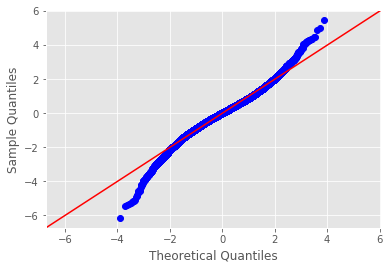

In [126]:
# Q-Q Plot, shows if the residuals are normally distributed.
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

__Observe:__

- The plot above show residuals normally distributed, however, the "tails", is indicative of the errors not being normally distributed. 
- NOTE: A good normal QQ plot has all of the residuals lying on or close to the red line.

<Figure size 1080x576 with 0 Axes>

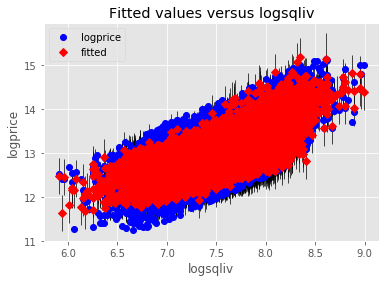

In [127]:
# sqft_living
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_fit(model, "logsqliv" );
plt.show()

- The plot_fit function plots the fitted values versus a chosen independent variable. 
- This plot shows if residuals have non-linear patterns. There could be a non-linear relationship between predictor variables and an outcome variable and the pattern could show up in this plot if the model doesn’t capture the non-linear relationship. 

__Observe:__

- Residuals have linear pattern

In [128]:
X_fin_B.columns

Index(['lat_(47.3, 47.4]', 'grad_6', 'lat_(47.1, 47.3]', 'logbedrms', 'grad_7',
       'grad_8', 'logsqliv', 'lat_(47.4, 47.5]', 'lat_(47.6, 47.7]',
       'view_4.0', 'grad_5', 'cond_3', 'grad_9', 'yr_built_(0, 1925]',
       'view_3.0', 'view_2.0', 'zip_(98030, 98040]', 'yr_built_(1925, 1950]',
       'zip_(98000, 98010]', 'grad_4', 'wf_1.0', 'long_(-122.5, -122.375]',
       'logsqlot', 'grad_10', 'view_1.0', 'yr_built_(2010, 2015]',
       'zip_(98110, 98120]', 'zip_(98040, 98050]', 'logbathrms',
       'yr_built_(1950, 1960]', 'cond_5', 'sqbase_(0.0, 2810.0]',
       'sqbase_(-1.0, 0.0]', 'yr_renov_(0, 2015]', 'yr_renov_(-1, 0]',
       'yr_built_(2000, 2005]', 'yr_built_(2005, 2010]',
       'long_(-122.0, -121.3]', 'cond_4', 'zip_(98010, 98030]',
       'zip_(98080, 98110]', 'zip_(98120, 98140]', 'long_(-122.1, -122.0]',
       'yr_built_(1970, 1980]', 'grad_11', 'long_(-122.35, -122.325]',
       'grad_13', 'yr_built_(1990, 2000]', 'logfl', 'long_(-122.2, -122.1]',
       'zip_

__Use Feature ranking with recursive feature elimination__

- Use feature ranking to select the 10 most important features

In [129]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 10)
selector = selector.fit(X_fin_B, y)

In [130]:
selector.support_ 

array([ True, False,  True, False, False, False,  True,  True,  True,
        True,  True, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False])

In [131]:
# Rank the list
# Calling .ranking_ shows the ranking of the features, selected features are assigned rank 1
selector.ranking_

array([ 1,  2,  1, 34,  4,  5,  1,  1,  1,  1,  1, 13,  6, 14,  1, 10, 15,
       17, 16,  3,  1, 19, 25,  7,  9, 21, 22, 18, 27, 35, 11, 32, 31, 20,
       28, 23, 24, 26, 12, 33, 29, 30, 42, 38,  8, 37,  1, 36, 41, 40, 39])

In [132]:
selected_columns_B = X_fin_B.columns[selector.support_ ]
linreg.fit(X_fin_B[selected_columns_B], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [133]:
X_fin_B[selected_columns_B].shape

(20412, 10)

In [134]:
selected_columns_B

Index(['lat_(47.3, 47.4]', 'lat_(47.1, 47.3]', 'logsqliv', 'lat_(47.4, 47.5]',
       'lat_(47.6, 47.7]', 'view_4.0', 'grad_5', 'view_3.0', 'wf_1.0',
       'grad_13'],
      dtype='object')

In [135]:
estimators = selector.estimator_
print(f"Prediction for estimate is based on Model: B")
print(f"estimators.coef_ : {estimators.coef_}")
print(f"estimators.intercept_ : {estimators.intercept_}")

Prediction for estimate is based on Model: B
estimators.coef_ : [-0.48836461 -0.53076431  0.73469468 -0.35153265  0.28678192  0.42984112
 -0.06278615  0.26622585  0.44617217  0.85652216]
estimators.intercept_ : 7.535253353190222


In [136]:
coeff_df = pd.DataFrame(estimators.coef_, X_fin_B[selected_columns_B].columns, columns=['Coefficient'])  
coeff_df

,Coefficient
"lat_(47.3, 47.4]",-0.488365
"lat_(47.1, 47.3]",-0.530764
logsqliv,0.734695
"lat_(47.4, 47.5]",-0.351533
"lat_(47.6, 47.7]",0.286782
view_4.0,0.429841
grad_5,-0.062786
view_3.0,0.266226
wf_1.0,0.446172
grad_13,0.856522


#### MODEL C

In [137]:
# Identify the best model from above summaries to generate the "Best Fit Regression Line"
y = data_norm["logprice"]
predictors = predictors_model_c

In [138]:
# Using Stepwise to detemine which features to include in the models with p-value <.05
result = stepwise_selection(predictors, data_norm["logprice"]) #, verbose = True)
print('Resulting Features:')
print(result)
X_feature_pvalue = result

Add  lat_(47.3, 47.4]               with p-value 0.0
Add  grad_6                         with p-value 0.0
Add  lat_(47.1, 47.3]               with p-value 0.0
Add  scalesqliv                     with p-value 0.0
Add  lat_(47.6, 47.7]               with p-value 0.0
Add  lat_(47.5, 47.6]               with p-value 0.0
Add  lat_(47.7, 47.8]               with p-value 0.0
Add  view_4.0                       with p-value 6.50901e-268
Add  grad_7                         with p-value 1.46846e-216
Add  grad_8                         with p-value 4.39319e-184
Add  grad_5                         with p-value 3.89125e-130
Add  cond_3                         with p-value 5.04937e-141
Add  grad_9                         with p-value 1.88476e-97
Add  yr_built_(0, 1925]             with p-value 1.80689e-80
Add  view_3.0                       with p-value 2.02944e-77
Add  view_2.0                       with p-value 1.01832e-75
Add  zip_(98030, 98040]             with p-value 2.6565e-65
Add  yr_built_(

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  yr_built_(1980, 1990]          with p-value 2.1031e-14
Add  long_(-122.0, -121.3]          with p-value 4.02761e-15
Add  cond_4                         with p-value 1.13358e-11
Drop cond_2                         with p-value 0.0750295
Add  yr_built_(1990, 2000]          with p-value 1.65846e-10
Add  scalebedrms                    with p-value 1.83647e-10
Add  yr_renov_(0, 2015]             with p-value 0.0
Add  zip_(98010, 98030]             with p-value 1.55877e-10
Add  zip_(98080, 98110]             with p-value 4.96899e-10
Add  zip_(98120, 98140]             with p-value 1.57465e-13
Add  sqbase_(0.0, 2810.0]           with p-value 2.65784e-11
Add  long_(-122.1, -122.0]          with p-value 3.984e-07
Add  grad_11                        with p-value 5.91235e-05
Add  long_(-122.35, -122.325]       with p-value 0.000695211
Add  grad_13                        with p-value 0.00236123
Add  yr_built_(1950, 1960]          with p-value 0.00349061
Add  scalefl                        wit

#### Build the final model again in Statsmodels

In [139]:
import statsmodels.api as sm
X_fin_C = predictors[X_feature_pvalue]
X_with_intercept = sm.add_constant(X_fin_C)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     2002.
Date:                Sat, 03 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:48:58   Log-Likelihood:                 2996.3
No. Observations:               20412   AIC:                            -5893.
Df Residuals:                   20362   BIC:                            -5496.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        8.2326      0.031    269.459      0.000       8.173       8.292
lat_(47.3, 47.4]            -0.2370      0.007    -35.402      0.000      -0.250      -0.224
grad_6                      -0.8553      0.040    -21.180      0.000      -0.935      -0.776
lat_(47.1, 47.3]            -0.2755      0.010    -28.039      0.000      -0.295      -0.256
scalesqliv                   1.3718      0.025     54.083      0.000       1.322       1.422
lat_(47.6, 47.7]             0.5062      0.006     82.979      0.000       0.494       0.518
lat_(47.5, 47.6]             0.2770      0.006     47.604      0.000       0.266       0.288
lat_(47.7, 47.8]             0.2651      0.006     44.829      0.000       0.254       0.277
view_4.0                     0.3335      0.017     19.583      0.000       0.300       0.367
grad_7                      -0.7125      0.040    -17.921      0.000      -0.790      -0.635
grad_8                      -0.5736      0.040    -14.519      0.000      -0.651      -0.496
grad_5                      -0.9567      0.043    -22.409      0.000      -1.040      -0.873
cond_3                       0.1405      0.016      9.008      0.000       0.110       0.171
grad_9                      -0.4270      0.039    -10.832      0.000      -0.504      -0.350
yr_built_(0, 1925]           0.0959      0.009     11.272      0.000       0.079       0.113
view_3.0                     0.1981      0.011     18.566      0.000       0.177       0.219
view_2.0                     0.1317      0.008     17.384      0.000       0.117       0.147
zip_(98030, 98040]           0.1570      0.006     28.223      0.000       0.146       0.168
yr_built_(1925, 1950]        0.0298      0.008      3.652      0.000       0.014       0.046
zip_(98000, 98010]           0.1578      0.006     25.941      0.000       0.146       0.170
grad_4                      -0.9548      0.057    -16.622      0.000      -1.067      -0.842
wf_1.0                       0.4020      0.025     16.153      0.000       0.353       0.451
long_(-122.5, -122.375]      0.0732      0.006     12.821      0.000       0.062       0.084
scalesqlot                   0.4554      0.022     20.804      0.000       0.412       0.498
grad_10                     -0.2974      0.040     -7.504      0.000      -0.375      -0.220
view_1.0                     0.1582      0.012     12.883      0.000       0.134       0.182
yr_built_(2010, 2015]        0.0593      0.008      7.845      0.000       0.045       0.074
zip_(98040, 98050]           0.1393      0.009     15.057      0.000       0.121       0.157
zip_(98110, 98120]           0.0969      0.006     15.572      0.000       0.085       0.109
scalebathrms                 0.1663      0.018      9.097      0.000       0.130       0.202
yr_built_(1970

#### MODEL C: Observations

- R2 (a)	0.828
- R2 adj (a)	0.828
- Prob (F-statistic)	0
- AIC	-5893
- BIC	-5496
- Skewness	-0.162
- Kurtosis	4.701
- Cond No.	1.13E+16
- Residual Gaph	Passed
- Homoscedasticity	Yes

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


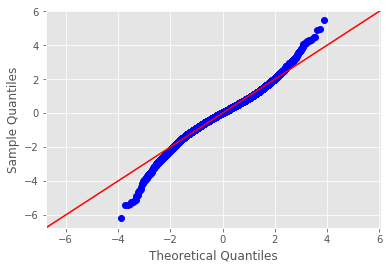

In [140]:
# Q-Q Plot
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

__Observe:__
- The plot above show residuals normally distributed, however, the "tails", is indicative of the errors not being normally distributed.
- NOTE: A good normal QQ plot has all of the residuals lying on or close to the red line.

<Figure size 1080x576 with 0 Axes>

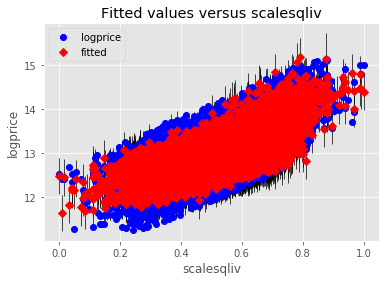

In [141]:
# Plot fit
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_fit(model, "scalesqliv" );
plt.show()

__Observe:__
- Residuals have linear pattern

In [142]:
X_fin_C.columns

Index(['lat_(47.3, 47.4]', 'grad_6', 'lat_(47.1, 47.3]', 'scalesqliv',
       'lat_(47.6, 47.7]', 'lat_(47.5, 47.6]', 'lat_(47.7, 47.8]', 'view_4.0',
       'grad_7', 'grad_8', 'grad_5', 'cond_3', 'grad_9', 'yr_built_(0, 1925]',
       'view_3.0', 'view_2.0', 'zip_(98030, 98040]', 'yr_built_(1925, 1950]',
       'zip_(98000, 98010]', 'grad_4', 'wf_1.0', 'long_(-122.5, -122.375]',
       'scalesqlot', 'grad_10', 'view_1.0', 'yr_built_(2010, 2015]',
       'zip_(98040, 98050]', 'zip_(98110, 98120]', 'scalebathrms',
       'yr_built_(1970, 1980]', 'cond_5', 'yr_renov_(-1, 0]',
       'yr_built_(1960, 1970]', 'yr_built_(1980, 1990]',
       'long_(-122.0, -121.3]', 'cond_4', 'yr_built_(1990, 2000]',
       'scalebedrms', 'yr_renov_(0, 2015]', 'zip_(98010, 98030]',
       'zip_(98080, 98110]', 'zip_(98120, 98140]', 'sqbase_(0.0, 2810.0]',
       'long_(-122.1, -122.0]', 'grad_11', 'long_(-122.35, -122.325]',
       'grad_13', 'yr_built_(1950, 1960]', 'scalefl', 'long_(-122.2, -122.1]'],
   

__Use Feature ranking with recursive feature elimination__
- Use feature ranking to select the 10 most important features

In [143]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 10)
selector = selector.fit(X_fin_C, y)

In [144]:
selector.support_ 

array([False, False, False,  True,  True,  True,  True,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False])

In [145]:
# Rank the list
# Calling .ranking_ shows the ranking of the features, selected features are assigned rank 1
selector.ranking_

array([12,  2, 11,  1,  1,  1,  1,  1,  4,  5,  1, 15,  6, 16,  1, 10, 20,
       36, 21,  3,  1, 23,  1,  7,  9, 32, 24, 25, 17, 26, 13, 22, 27, 28,
       30, 14, 29, 18, 19, 35, 33, 34, 38, 41,  8, 39,  1, 31, 37, 40])

In [146]:
selected_columns_C = X_fin_C.columns[selector.support_ ]
linreg.fit(X_fin_C[selected_columns_C], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [147]:
selected_columns_C

Index(['scalesqliv', 'lat_(47.6, 47.7]', 'lat_(47.5, 47.6]',
       'lat_(47.7, 47.8]', 'view_4.0', 'grad_5', 'view_3.0', 'wf_1.0',
       'scalesqlot', 'grad_13'],
      dtype='object')

In [148]:
estimators = selector.estimator_
print(f"Prediction for estimate is based on Model: C")
print(f"estimators.coef_ : {estimators.coef_}")
print(f"estimators.intercept_ : {estimators.intercept_}")

Prediction for estimate is based on Model: C
estimators.coef_ : [ 2.175549    0.74476205  0.47612104  0.40121939  0.42512595 -0.07477191
  0.2574919   0.43514178  0.30175762  0.87508505]
estimators.intercept_ : 11.374350434580322


In [149]:
coeff_df = pd.DataFrame(estimators.coef_, X_fin_C[selected_columns_C].columns, columns=['Coefficient'])  
coeff_df

,Coefficient
scalesqliv,2.175549
"lat_(47.6, 47.7]",0.744762
"lat_(47.5, 47.6]",0.476121
"lat_(47.7, 47.8]",0.401219
view_4.0,0.425126
grad_5,-0.074772
view_3.0,0.257492
wf_1.0,0.435142
scalesqlot,0.301758
grad_13,0.875085


#### Model D

In [150]:
# Data OLS: Includes No lat/long, scaled tranformations and categorical features to generate OLS Regression results
data_ols = pd.concat([data_scale, view_dummies, sqbase_dummies,  wf_dummies, grad_dummies, cond_dummies, yr_built_dummies, yr_renov_dummies, zip_dummies], axis= 1)
data_ols.head()

,scalebedrms,scalesqliv,scalesqlot,scalebathrms,scalefl,logprice,view_1.0,view_2.0,view_3.0,view_4.0,...,"zip_(98010, 98030]","zip_(98030, 98040]","zip_(98040, 98050]","zip_(98050, 98060]","zip_(98060, 98080]","zip_(98080, 98110]","zip_(98110, 98120]","zip_(98120, 98140]","zip_(98140, 98170]","zip_(98170, 98200]"
11,0.301030,0.371457,0.317036,0.270238,0.000000,13.056224,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12,0.477121,0.439481,0.472464,0.270238,0.323657,12.644328,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13,0.477121,0.425547,0.379038,0.488416,0.000000,12.899220,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14,0.698970,0.516086,0.289453,0.540476,0.323657,13.180632,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15,0.602060,0.674879,0.293401,0.698555,0.553295,13.384728,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [151]:
# Model D Summary
predictors_model_d = data_ols.drop("logprice", axis = 1)
predictors_int = sm.add_constant(predictors_model_d)
model = sm.OLS(data_norm["logprice"],predictors_int).fit()
print(f"MODEL D: Model Summary: No lat/long, scaled transformations  ")
model.summary()

MODEL D: Model Summary: No lat/long, scaled transformations  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     827.0
Date:                Sat, 03 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:49:01   Log-Likelihood:                -4366.2
No. Observations:               20412   AIC:                             8824.
Df Residuals:                   20366   BIC:                             9189.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.763e+10    2.2e+11      0.126      0.900   -4.03e+11    4.59e+11
scalebedrms              -0.2165      0.024     -8.894      0.000      -0.264      -0.169
scalesqliv                1.2732      0.036     34.918      0.000       1.202       1.345
scalesqlot               -0.0293      0.030     -0.972      0.331      -0.088       0.030
scalebathrms              0.2699      0.026     10.306      0.000       0.219       0.321
scalefl                   0.0434      0.013      3.463      0.001       0.019       0.068
view_1.0                  0.1580      0.018      9.000      0.000       0.124       0.192
view_2.0                  0.1146      0.011     10.581      0.000       0.093       0.136
view_3.0                  0.1509      0.015      9.891      0.000       0.121       0.181
view_4.0                  0.2962      0.024     12.138      0.000       0.248       0.344
sqbase_(-1.0, 0.0]     3.156e+10   2.51e+11      0.126      0.900   -4.61e+11    5.24e+11
sqbase_(0.0, 2810.0]   3.156e+10   2.51e+11      0.126      0.900   -4.61e+11    5.24e+11
wf_1.0                    0.3243      0.036      9.087      0.000       0.254       0.394
grad_4                   -0.3066      0.306     -1.003      0.316      -0.906       0.293
grad_5                   -0.3232      0.301     -1.074      0.283      -0.913       0.267
grad_6                   -0.1597      0.300     -0.532      0.595      -0.749       0.429
grad_7                    0.0676      0.301      0.225      0.822      -0.522       0.657
grad_8                    0.2903      0.301      0.966      0.334      -0.299       0.880
grad_9                    0.5276      0.301      1.754      0.079      -0.062       1.117
grad_10                   0.7304      0.301      2.427      0.015       0.141       1.320
grad_11                   0.9456      0.301      3.137      0.002       0.355       1.536
grad_12                   1.1703      0.306      3.822      0.000       0.570       1.771
grad_13                   1.7713      0.426      4.160      0.000       0.937       2.606
cond_2                   -0.0172      0.062     -0.280      0.780      -0.138       0.104
cond_3                    0.1315      0.057      2.295      0.022       0.019       0.244
cond_4                    0.1747      0.057      3.047      0.002       0.062       0.287
cond_5                    0.2272      0.058      3.940      0.000       0.114       0.340
yr_built_(0, 1925]     4.942e+09   3.93e+10      0.126      0.900   -7.22e+10    8.21e+10
yr_built_(1925, 1950]  4.942e+09   3.93e+10      0.126      0.900   -7.22e+10    8.21e+10
yr_built_(1950, 1960]  4.942e+09   3.93e+10      0.126      0.900   -7.22e+10    8.21e+10
yr_built_(1960, 1970]  4.942e+09   3.93e+10      0.126      0.900   -7.22e+10    8.21e+10
yr_built_(1970, 1980]  

In [152]:
y = data_norm["logprice"]
predictors = predictors_model_d

In [153]:
# Using Stepwise to detemine which features to include in the models with p-value <.05
result = stepwise_selection(predictors, data_norm["logprice"]) #, verbose = True)
print('Resulting Features:')
print(result)
X_feature_pvalue = result

Add  grad_6                         with p-value 0.0
Add  scalesqliv                     with p-value 0.0
Add  zip_(98110, 98120]             with p-value 0.0
Add  grad_7                         with p-value 5.34739e-287
Add  grad_8                         with p-value 1.86074e-203
Add  yr_built_(0, 1925]             with p-value 1.42103e-189
Add  grad_5                         with p-value 1.5999e-211
Add  yr_built_(1925, 1950]          with p-value 3.80992e-261
Add  view_4.0                       with p-value 3.71457e-114
Add  grad_9                         with p-value 5.71567e-99
Add  yr_built_(1950, 1960]          with p-value 1.81739e-94
Add  grad_4                         with p-value 5.46084e-78
Add  zip_(98040, 98050]             with p-value 6.61251e-73
Add  zip_(98010, 98030]             with p-value 2.2961e-89
Add  zip_(98140, 98170]             with p-value 1.66801e-52
Add  zip_(98170, 98200]             with p-value 1.2722e-40
Add  grad_10                        with p-va

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Resulting Features:
['grad_6', 'scalesqliv', 'zip_(98110, 98120]', 'grad_8', 'yr_built_(0, 1925]', 'grad_5', 'yr_built_(1925, 1950]', 'view_4.0', 'grad_9', 'yr_built_(1950, 1960]', 'grad_4', 'zip_(98040, 98050]', 'zip_(98010, 98030]', 'zip_(98140, 98170]', 'zip_(98170, 98200]', 'grad_10', 'cond_5', 'zip_(98050, 98060]', 'view_2.0', 'view_3.0', 'view_1.0', 'wf_1.0', 'scalebathrms', 'cond_4', 'yr_built_(1990, 2000]', 'scalebedrms', 'cond_3', 'yr_built_(1960, 1970]', 'zip_(98000, 98010]', 'sqbase_(-1.0, 0.0]', 'sqbase_(0.0, 2810.0]', 'yr_built_(1980, 1990]', 'grad_12', 'scalefl', 'grad_13', 'grad_11']


__Build the final model again in Statsmodels__

In [154]:
import statsmodels.api as sm
X_fin_D = predictors[X_feature_pvalue]
X_with_intercept = sm.add_constant(X_fin_D)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1142.
Date:                Sat, 03 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:49:48   Log-Likelihood:                -3890.4
No. Observations:               20412   AIC:                             7853.
Df Residuals:                   20376   BIC:                             8138.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.9787      0.017    464.373      0.000       7.945       8.012
grad_6                   -0.2288      0.008    -28.034      0.000      -0.245      -0.213
scalesqliv                1.2654      0.032     39.030      0.000       1.202       1.329
zip_(98110, 98120]        0.1180      0.007     16.093      0.000       0.104       0.132
grad_8                    0.2248      0.006     39.471      0.000       0.214       0.236
yr_built_(0, 1925]        0.3432      0.009     38.113      0.000       0.326       0.361
grad_5                   -0.3937      0.020    -19.298      0.000      -0.434      -0.354
yr_built_(1925, 1950]     0.2637      0.008     31.718      0.000       0.247       0.280
view_4.0                  0.2976      0.024     12.503      0.000       0.251       0.344
grad_9                    0.4615      0.008     54.553      0.000       0.445       0.478
yr_built_(1950, 1960]     0.1549      0.009     18.192      0.000       0.138       0.172
grad_4                   -0.3785      0.057     -6.610      0.000      -0.491      -0.266
zip_(98040, 98050]       -0.2698      0.012    -23.108      0.000      -0.293      -0.247
zip_(98010, 98030]       -0.1702      0.007    -24.092      0.000      -0.184      -0.156
zip_(98140, 98170]       -0.1632      0.008    -19.565      0.000      -0.180      -0.147
zip_(98170, 98200]       -0.1631      0.009    -17.426      0.000      -0.181      -0.145
grad_10                   0.6649      0.012     55.221      0.000       0.641       0.689
cond_5                    0.2423      0.023     10.645      0.000       0.198       0.287
zip_(98050, 98060]       -0.0750      0.007    -10.601      0.000      -0.089      -0.061
view_2.0                  0.1144      0.011     10.837      0.000       0.094       0.135
view_3.0                  0.1524      0.015     10.240      0.000       0.123       0.182
view_1.0                  0.1581      0.017      9.234      0.000       0.125       0.192
wf_1.0                    0.3288      0.035      9.457      0.000       0.261       0.397
scalebathrms              0.2673      0.025     10.729      0.000       0.218       0.316
cond_4                    0.1906      0.022      8.705      0.000       0.148       0.234
yr_built_(1990, 2000]    -0.0653      0.008     -8.433      0.000      -0.080      -0.050
scalebedrms              -0.2131      0.024     -9.054      0.000      -0.259      -0.167
cond_3                    0.1467      0.022      6.736      0.000       0.104       0.189
yr_built_(1960, 1970]     0.0454      0.008      5.646      0.000       0.030       0.061
zip_(98000, 98010]       -0.0366      0.007     -4.935      0.000      -0.051      -0.022
sqbase_(-1.0, 0.0]        3.9753      0.009    466.278      0.000       3.959       3.992
sqbase_(0.0, 2810.0]   

#### MODEL D: Observations
- R2 (a)	0.662
- R2 adj (a)	0.662
- Prob (F-statistic)	0
- AIC	7853
- BIC	8138
- Skewness	-0.077
- Kurtosis	3.345
- Cond No.	5.63E+15
- Residual Gaph	Passed (No tails)
- Homoscedasticity	Yes

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


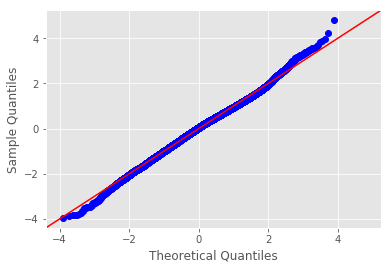

In [155]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

__Observe:__

- A good normal QQ plot  all of the residuals lying on or close to the red line.

<Figure size 1080x576 with 0 Axes>

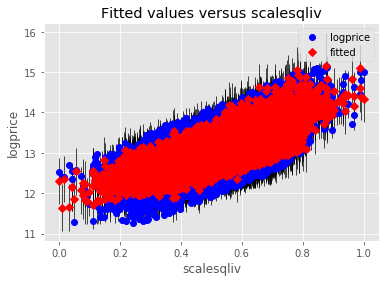

In [156]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_fit(model, "scalesqliv" );
plt.show()

__Observe:__
- Residuals have linear pattern

In [157]:
X_fin_D.columns

Index(['grad_6', 'scalesqliv', 'zip_(98110, 98120]', 'grad_8',
       'yr_built_(0, 1925]', 'grad_5', 'yr_built_(1925, 1950]', 'view_4.0',
       'grad_9', 'yr_built_(1950, 1960]', 'grad_4', 'zip_(98040, 98050]',
       'zip_(98010, 98030]', 'zip_(98140, 98170]', 'zip_(98170, 98200]',
       'grad_10', 'cond_5', 'zip_(98050, 98060]', 'view_2.0', 'view_3.0',
       'view_1.0', 'wf_1.0', 'scalebathrms', 'cond_4', 'yr_built_(1990, 2000]',
       'scalebedrms', 'cond_3', 'yr_built_(1960, 1970]', 'zip_(98000, 98010]',
       'sqbase_(-1.0, 0.0]', 'sqbase_(0.0, 2810.0]', 'yr_built_(1980, 1990]',
       'grad_12', 'scalefl', 'grad_13', 'grad_11'],
      dtype='object')

__Use Feature ranking with recursive feature elimination__

- Use feature ranking to select the 10 most important features

In [158]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 10)
selector = selector.fit(X_fin_D, y)

In [159]:
selector.support_ 

array([False,  True, False, False, False,  True, False,  True,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True,  True])

In [160]:
# Rank the list
selector.ranking_

array([ 4,  1,  7,  6,  2,  1,  5,  1,  1, 16,  3,  1, 10, 17, 18,  1, 13,
       20, 19,  9,  8,  1, 12, 14, 21, 11, 15, 22, 23, 26, 27, 24,  1, 25,
        1,  1])

In [161]:
selected_columns_D = X_fin_D.columns[selector.support_ ]
linreg.fit(X_fin_D[selected_columns_D], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [162]:
selected_columns_D

Index(['scalesqliv', 'grad_5', 'view_4.0', 'grad_9', 'zip_(98040, 98050]',
       'grad_10', 'wf_1.0', 'grad_12', 'grad_13', 'grad_11'],
      dtype='object')

In [163]:
estimators = selector.estimator_
print(f"Prediction for estimate is based on Model: D")
print(f"estimators.coef_ : {estimators.coef_}")
print(f"estimators.intercept_ : {estimators.intercept_}")

Prediction for estimate is based on Model: D
estimators.coef_ : [ 1.76524727 -0.24381174  0.37496179  0.28594848 -0.33084721  0.45717641
  0.3380203   0.88638929  1.18538578  0.65319122]
estimators.intercept_ : 12.040322024492852


In [164]:
coeff_df = pd.DataFrame(estimators.coef_, X_fin_D[selected_columns_D].columns, columns=['Coefficient'])  
coeff_df

,Coefficient
scalesqliv,1.765247
grad_5,-0.243812
view_4.0,0.374962
grad_9,0.285948
"zip_(98040, 98050]",-0.330847
grad_10,0.457176
wf_1.0,0.338020
grad_12,0.886389
grad_13,1.185386
grad_11,0.653191


#### MODEL E

In [165]:
# Data OLS: Includes Zipcodes, scaled tranformations and categorical features to generate OLS Regression results
data_ols = pd.concat([data_scale, lat_dummies, long_dummies, view_dummies, sqbase_dummies,  wf_dummies, grad_dummies, cond_dummies, yr_built_dummies, yr_renov_dummies], axis= 1)
data_ols.head()

,scalebedrms,scalesqliv,scalesqlot,scalebathrms,scalefl,logprice,"lat_(47.1, 47.3]","lat_(47.3, 47.4]","lat_(47.4, 47.5]","lat_(47.5, 47.6]",...,"yr_built_(1950, 1960]","yr_built_(1960, 1970]","yr_built_(1970, 1980]","yr_built_(1980, 1990]","yr_built_(1990, 2000]","yr_built_(2000, 2005]","yr_built_(2005, 2010]","yr_built_(2010, 2015]","yr_renov_(-1, 0]","yr_renov_(0, 2015]"
11,0.301030,0.371457,0.317036,0.270238,0.000000,13.056224,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12,0.477121,0.439481,0.472464,0.270238,0.323657,12.644328,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13,0.477121,0.425547,0.379038,0.488416,0.000000,12.899220,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
14,0.698970,0.516086,0.289453,0.540476,0.323657,13.180632,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15,0.602060,0.674879,0.293401,0.698555,0.553295,13.384728,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [166]:
# Model E Summary
predictors_model_e = data_ols.drop("logprice", axis = 1)
predictors_int = sm.add_constant(predictors_model_e)
model = sm.OLS(data_norm["logprice"],predictors_int).fit()
print(f"MODEL E: Model Summary: lat/long (no zipcodes), scaled transformations  ")
model.summary()

MODEL E: Model Summary: lat/long (no zipcodes), scaled transformations  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1851.
Date:                Sat, 03 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:49:51   Log-Likelihood:                 2168.1
No. Observations:               20412   AIC:                            -4238.
Df Residuals:                   20363   BIC:                            -3850.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     3.393e+10   1.54e+11      0.221      0.825   -2.67e+11    3.35e+11
scalebedrms                 -0.0947      0.018     -5.342      0.000      -0.129      -0.060
scalesqliv                   1.3321      0.026     50.421      0.000       1.280       1.384
scalesqlot                   0.4448      0.023     19.633      0.000       0.400       0.489
scalebathrms                 0.1922      0.019     10.109      0.000       0.155       0.229
scalefl                     -0.0284      0.009     -3.117      0.002      -0.046      -0.011
lat_(47.1, 47.3]          9.284e+09   4.21e+10      0.221      0.825   -7.32e+10    9.18e+10
lat_(47.3, 47.4]          9.284e+09   4.21e+10      0.221      0.825   -7.32e+10    9.18e+10
lat_(47.4, 47.5]          9.284e+09   4.21e+10      0.221      0.825   -7.32e+10    9.18e+10
lat_(47.5, 47.6]          9.284e+09   4.21e+10      0.221      0.825   -7.32e+10    9.18e+10
lat_(47.6, 47.7]          9.284e+09   4.21e+10      0.221      0.825   -7.32e+10    9.18e+10
lat_(47.7, 47.8]          9.284e+09   4.21e+10      0.221      0.825   -7.32e+10    9.18e+10
long_(-122.5, -122.375]     -0.0250      0.099     -0.254      0.800      -0.219       0.168
long_(-122.375, -122.35]    -0.0904      0.099     -0.916      0.360      -0.284       0.103
long_(-122.35, -122.325]    -0.1195      0.099     -1.210      0.226      -0.313       0.074
long_(-122.325, -122.3]     -0.1036      0.099     -1.049      0.294      -0.297       0.090
long_(-122.3, -122.2]       -0.0591      0.099     -0.599      0.549      -0.253       0.134
long_(-122.2, -122.1]       -0.0830      0.099     -0.841      0.400      -0.276       0.110
long_(-122.1, -122.0]       -0.0858      0.099     -0.869      0.385      -0.279       0.108
long_(-122.0, -121.3]       -0.1532      0.099     -1.550      0.121      -0.347       0.040
view_1.0                     0.1626      0.013     12.715      0.000       0.138       0.188
view_2.0                     0.1298      0.008     16.458      0.000       0.114       0.145
view_3.0                     0.1910      0.011     17.191      0.000       0.169       0.213
view_4.0                     0.3384      0.018     19.054      0.000       0.304       0.373
sqbase_(-1.0, 0.0]        3.996e+10   1.81e+11      0.221      0.825   -3.15e+11    3.95e+11
sqbase_(0.0, 2810.0]      3.996e+10   1.81e+11      0.221      0.825   -3.15e+11    3.95e+11
wf_1.0                       0.3724      0.026     14.254      0.000       0.321       0.424
grad_4                      -0.6520      0.222     -2.934      0.003      -1.088      -0.216
grad_5                      -0.6504      0.219     -2.974      0.003      -1.079      -0.222
grad_6                      -0.5450      0.218     -2.496      0.013      -0.973      -0.117
grad_7        

In [167]:
y = data_norm["logprice"]
predictors = predictors_model_e

In [168]:
# Using Stepwise to detemine which features to include in the models with p-value <.05
result = stepwise_selection(predictors, data_norm["logprice"]) #, verbose = True)
print('Resulting Features:')
print(result)
X_feature_pvalue = result

Add  lat_(47.3, 47.4]               with p-value 0.0
Add  grad_6                         with p-value 0.0
Add  lat_(47.1, 47.3]               with p-value 0.0
Add  scalesqliv                     with p-value 0.0
Add  lat_(47.4, 47.5]               with p-value 0.0
Add  lat_(47.6, 47.7]               with p-value 0.0
Add  view_4.0                       with p-value 1.53354e-269
Add  grad_7                         with p-value 3.24238e-224
Add  grad_8                         with p-value 6.09355e-191
Add  grad_5                         with p-value 1.3725e-128
Add  cond_3                         with p-value 6.3207e-144
Add  grad_9                         with p-value 1.02185e-99
Add  yr_built_(0, 1925]             with p-value 1.75874e-87
Add  view_3.0                       with p-value 7.87268e-79
Add  view_2.0                       with p-value 1.87107e-77
Add  yr_built_(1925, 1950]          with p-value 2.64475e-61
Add  grad_4                         with p-value 1.25056e-58
Add  wf_

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  yr_built_(2000, 2005]          with p-value 1.21348e-11
Add  yr_built_(2005, 2010]          with p-value 5.15422e-15
Add  cond_4                         with p-value 2.86805e-11
Drop cond_2                         with p-value 0.116602
Add  lat_(47.7, 47.8]               with p-value 4.91905e-10
Add  yr_built_(1950, 1960]          with p-value 9.31071e-09
Add  sqbase_(-1.0, 0.0]             with p-value 2.74375e-09
Add  yr_renov_(0, 2015]             with p-value 0.0
Add  scalebedrms                    with p-value 1.19128e-08
Add  long_(-122.35, -122.325]       with p-value 1.03028e-06
Add  grad_11                        with p-value 1.53387e-05
Add  long_(-122.325, -122.3]        with p-value 0.00168449
Add  yr_built_(1980, 1990]          with p-value 0.00454179
Add  grad_13                        with p-value 0.00911377
Add  scalefl                        with p-value 0.00878652
Resulting Features:
['lat_(47.3, 47.4]', 'grad_6', 'lat_(47.1, 47.3]', 'scalesqliv', 'lat_(47.4, 47.

__Build the final model again in Statsmodels__

In [169]:
import statsmodels.api as sm
X_fin_E = predictors[X_feature_pvalue]
X_with_intercept = sm.add_constant(X_fin_E)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     2179.
Date:                Sat, 03 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:50:55   Log-Likelihood:                 2413.4
No. Observations:               20412   AIC:                            -4741.
Df Residuals:                   20369   BIC:                            -4400.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        8.4299      0.031    267.776      0.000       8.368       8.492
lat_(47.3, 47.4]            -0.4608      0.005    -84.232      0.000      -0.472      -0.450
grad_6                      -0.9070      0.042    -21.853      0.000      -0.988      -0.826
lat_(47.1, 47.3]            -0.5207      0.009    -59.242      0.000      -0.538      -0.503
scalesqliv                   1.3333      0.026     51.329      0.000       1.282       1.384
lat_(47.4, 47.5]            -0.3194      0.005    -58.589      0.000      -0.330      -0.309
lat_(47.6, 47.7]             0.2409      0.004     55.431      0.000       0.232       0.249
view_4.0                     0.3351      0.017     19.155      0.000       0.301       0.369
grad_7                      -0.7557      0.041    -18.492      0.000      -0.836      -0.676
grad_8                      -0.6185      0.041    -15.229      0.000      -0.698      -0.539
grad_5                      -1.0129      0.044    -23.095      0.000      -1.099      -0.927
cond_3                       0.1390      0.016      8.665      0.000       0.108       0.170
grad_9                      -0.4683      0.041    -11.555      0.000      -0.548      -0.389
yr_built_(0, 1925]           0.1621      0.007     23.602      0.000       0.149       0.176
view_3.0                     0.1901      0.011     17.342      0.000       0.169       0.212
view_2.0                     0.1291      0.008     16.604      0.000       0.114       0.144
yr_built_(1925, 1950]        0.0931      0.006     15.199      0.000       0.081       0.105
grad_4                      -1.0142      0.059    -17.190      0.000      -1.130      -0.899
wf_1.0                       0.3755      0.026     14.679      0.000       0.325       0.426
view_1.0                     0.1614      0.013     12.783      0.000       0.137       0.186
scalesqlot                   0.4443      0.022     20.363      0.000       0.402       0.487
grad_10                     -0.3329      0.041     -8.170      0.000      -0.413      -0.253
yr_built_(2010, 2015]        0.1110      0.008     13.555      0.000       0.095       0.127
long_(-122.5, -122.375]      0.0607      0.006     10.234      0.000       0.049       0.072
scalebathrms                 0.2015      0.018     10.985      0.000       0.166       0.237
long_(-122.3, -122.2]        0.0259      0.004      6.307      0.000       0.018       0.034
yr_renov_(-1, 0]             4.1764      0.016    264.684      0.000       4.145       4.207
cond_5                       0.2648      0.017     15.804      0.000       0.232       0.298
yr_built_(1970, 1980]       -0.0267      0.006     -4.643      0.000      -0.038      -0.015
long_(-122.0, -121.3]       -0.0667      0.007     -9.834      0.000      -0.080      -0.053
yr_built_(2000

__MODEL E: Observations__

- R2 (a)	0.818
- R2 adj (a)	0.818
- Prob (F-statistic)	0
- AIC	-4741
- BIC	-4409
- Skewness	-0.1
- Kurtosis	4.61
- Cond No.	1.04E+15
- Residual Gaph	Passed
- Homoscedasticity	Yes

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


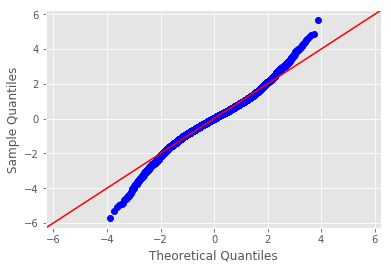

In [170]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

__Observe:__
- The plot above show residuals normally distributed, however, the "tails", is indicative of the errors not being normally distributed.
- NOTE: A good normal QQ plot has all of the residuals lying on or close to the red line.

<Figure size 1080x576 with 0 Axes>

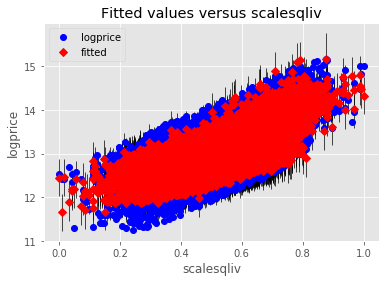

In [171]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_fit(model, "scalesqliv" );
plt.show()

__Observe:__
- Residuals have linear pattern

In [172]:
X_fin_E.columns

Index(['lat_(47.3, 47.4]', 'grad_6', 'lat_(47.1, 47.3]', 'scalesqliv',
       'lat_(47.4, 47.5]', 'lat_(47.6, 47.7]', 'view_4.0', 'grad_7', 'grad_8',
       'grad_5', 'cond_3', 'grad_9', 'yr_built_(0, 1925]', 'view_3.0',
       'view_2.0', 'yr_built_(1925, 1950]', 'grad_4', 'wf_1.0', 'view_1.0',
       'scalesqlot', 'grad_10', 'yr_built_(2010, 2015]',
       'long_(-122.5, -122.375]', 'scalebathrms', 'long_(-122.3, -122.2]',
       'yr_renov_(-1, 0]', 'cond_5', 'yr_built_(1970, 1980]',
       'long_(-122.0, -121.3]', 'yr_built_(2000, 2005]',
       'yr_built_(2005, 2010]', 'cond_4', 'lat_(47.7, 47.8]',
       'yr_built_(1950, 1960]', 'sqbase_(-1.0, 0.0]', 'yr_renov_(0, 2015]',
       'scalebedrms', 'long_(-122.35, -122.325]', 'grad_11',
       'long_(-122.325, -122.3]', 'yr_built_(1980, 1990]', 'grad_13',
       'scalefl'],
      dtype='object')

__Use Feature ranking with recursive feature elimination__

- Use feature ranking to select the 10 most important features

In [173]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 10)
selector = selector.fit(X_fin_E, y)

In [174]:
selector.support_ 

array([ True, False,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False])

In [175]:
selector.ranking_ 

array([ 1,  3,  1,  1,  1,  1,  1,  5,  6,  2, 14,  7, 15,  1, 11, 18,  4,
        1, 10,  1,  8, 19, 21, 16, 29, 26, 12, 32, 22, 23, 24, 13, 28, 25,
       30, 20, 17, 27,  9, 33, 34,  1, 31])

In [176]:
selected_columns_E = X_fin_E.columns[selector.support_ ]
linreg.fit(X_fin_E[selected_columns_E], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [177]:
selected_columns_E

Index(['lat_(47.3, 47.4]', 'lat_(47.1, 47.3]', 'scalesqliv',
       'lat_(47.4, 47.5]', 'lat_(47.6, 47.7]', 'view_4.0', 'view_3.0',
       'wf_1.0', 'scalesqlot', 'grad_13'],
      dtype='object')

In [178]:
estimators = selector.estimator_
print(f"Prediction for estimate is based on Model: E")
print(f"estimators.coef_ : {estimators.coef_}")
print(f"estimators.intercept_ : {estimators.intercept_}")

Prediction for estimate is based on Model: E
estimators.coef_ : [-0.49383932 -0.54300801  2.2121562  -0.36425733  0.2963808   0.42609302
  0.26318259  0.43129551  0.23702906  0.83012389]
estimators.intercept_ : 11.822742925699725


In [179]:
coeff_df = pd.DataFrame(estimators.coef_, X_fin_E[selected_columns_E].columns, columns=['Coefficient'])  
coeff_df

,Coefficient
"lat_(47.3, 47.4]",-0.493839
"lat_(47.1, 47.3]",-0.543008
scalesqliv,2.212156
"lat_(47.4, 47.5]",-0.364257
"lat_(47.6, 47.7]",0.296381
view_4.0,0.426093
view_3.0,0.263183
wf_1.0,0.431296
scalesqlot,0.237029
grad_13,0.830124


#### MODEL F

In [180]:
# Data OLS: Includes All zipcodes, scaled tranformations and categorical features to generate OLS Regression results
data_ols = pd.concat([data_scale,  view_dummies, sqbase_dummies,  wf_dummies, grad_dummies, cond_dummies, yr_built_dummies, yr_renov_dummies, zip_all_dummies], axis= 1)
data_ols.head()

,scalebedrms,scalesqliv,scalesqlot,scalebathrms,scalefl,logprice,view_1.0,view_2.0,view_3.0,view_4.0,...,zipAll_98146,zipAll_98148,zipAll_98155,zipAll_98166,zipAll_98168,zipAll_98177,zipAll_98178,zipAll_98188,zipAll_98198,zipAll_98199
11,0.301030,0.371457,0.317036,0.270238,0.000000,13.056224,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0.477121,0.439481,0.472464,0.270238,0.323657,12.644328,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0.477121,0.425547,0.379038,0.488416,0.000000,12.899220,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0.698970,0.516086,0.289453,0.540476,0.323657,13.180632,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0.602060,0.674879,0.293401,0.698555,0.553295,13.384728,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
# Model F Summary
predictors_model_f = data_ols.drop("logprice", axis = 1)
predictors_int = sm.add_constant(predictors_model_f)
model = sm.OLS(data_norm["logprice"],predictors_int).fit()
print(f"MODEL F: Model Summary: all zipcodes, scaled transformations  ")
model.summary()

MODEL F: Model Summary: all zipcodes, scaled transformations  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     1339.
Date:                Sat, 03 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:50:57   Log-Likelihood:                 6063.1
No. Observations:               20412   AIC:                        -1.192e+04
Df Residuals:                   20307   BIC:                        -1.108e+04
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -8.621e+09   1.39e+11     -0.062      0.950   -2.81e+11    2.63e+11
scalebedrms              -0.0512      0.015     -3.470      0.001      -0.080      -0.022
scalesqliv                1.3500      0.022     60.906      0.000       1.307       1.393
scalesqlot                0.6039      0.020     30.136      0.000       0.565       0.643
scalebathrms              0.1335      0.016      8.443      0.000       0.103       0.164
scalefl                  -0.0454      0.008     -5.938      0.000      -0.060      -0.030
view_1.0                  0.1390      0.011     13.048      0.000       0.118       0.160
view_2.0                  0.1300      0.007     19.709      0.000       0.117       0.143
view_3.0                  0.2063      0.009     22.245      0.000       0.188       0.225
view_4.0                  0.3509      0.015     23.717      0.000       0.322       0.380
sqbase_(-1.0, 0.0]    -9.994e+09   1.61e+11     -0.062      0.950   -3.25e+11    3.05e+11
sqbase_(0.0, 2810.0]  -9.994e+09   1.61e+11     -0.062      0.950   -3.25e+11    3.05e+11
wf_1.0                    0.4116      0.022     18.936      0.000       0.369       0.454
grad_4                   -0.5477      0.184     -2.974      0.003      -0.909      -0.187
grad_5                   -0.5778      0.181     -3.188      0.001      -0.933      -0.223
grad_6                   -0.4900      0.181     -2.708      0.007      -0.845      -0.135
grad_7                   -0.3892      0.181     -2.150      0.032      -0.744      -0.034
grad_8                   -0.2908      0.181     -1.606      0.108      -0.646       0.064
grad_9                   -0.1665      0.181     -0.919      0.358      -0.522       0.189
grad_10                  -0.0667      0.181     -0.368      0.713      -0.422       0.289
grad_11                   0.0649      0.182      0.358      0.721      -0.291       0.421
grad_12                   0.1698      0.185      0.920      0.357      -0.192       0.531
grad_13                   0.7586      0.256      2.959      0.003       0.256       1.261
cond_2                    0.1342      0.037      3.614      0.000       0.061       0.207
cond_3                    0.2688      0.035      7.785      0.000       0.201       0.336
cond_4                    0.3152      0.035      9.121      0.000       0.247       0.383
cond_5                    0.3720      0.035     10.700      0.000       0.304       0.440
yr_built_(0, 1925]    -1.357e+09   2.18e+10     -0.062      0.950   -4.42e+10    4.15e+10
yr_built_(1925, 1950] -1.357e+09   2.18e+10     -0.062      0.950   -4.42e+10    4.15e+10
yr_built_(1950, 1960] -1.357e+09   2.18e+10     -0.062      0.950   -4.42e+10    4.15e+10
yr_built_(1960, 1970] -1.357e+09   2.18e+10     -0.062      0.950   -4.42e+10    4.15e+10
yr_built_(1970, 1980] -

In [182]:
y = data_norm["logprice"]
predictors = predictors_model_f

In [183]:
# Using Stepwise to detemine which features to include in the models with p-value <.05
result = stepwise_selection(predictors, data_norm["logprice"]) #, verbose = True)
print('Resulting Features:')
print(result)
X_feature_pvalue = result

Add  scalesqliv                     with p-value 0.0
Add  yr_built_(0, 1925]             with p-value 1.98213e-221
Add  zipAll_98004                   with p-value 5.76915e-223
Add  zipAll_98023                   with p-value 1.99446e-192
Add  grad_7                         with p-value 7.35957e-153
Add  grad_6                         with p-value 1.8027e-237
Add  yr_built_(1925, 1950]          with p-value 8.09804e-274
Add  grad_8                         with p-value 6.26134e-177
Add  grad_5                         with p-value 0.0
Add  zipAll_98092                   with p-value 1.4657e-132
Add  zipAll_98042                   with p-value 2.64486e-141
Add  view_4.0                       with p-value 1.29461e-129
Add  zipAll_98040                   with p-value 2.10548e-124
Add  zipAll_98033                   with p-value 1.43421e-125
Add  zipAll_98003                   with p-value 3.15351e-109
Add  zipAll_98038                   with p-value 1.25244e-106
Add  zipAll_98030           

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Drop zipAll_98106                   with p-value 0.811288
Add  cond_2                         with p-value 1.33463e-25
Add  zipAll_98155                   with p-value 1.96847e-24
Add  zipAll_98065                   with p-value 3.20073e-28
Add  zipAll_98011                   with p-value 2.44977e-30
Add  zipAll_98028                   with p-value 1.25487e-28
Add  zipAll_98077                   with p-value 1.50395e-28
Add  scalebathrms                   with p-value 1.27526e-23
Drop zipAll_98146                   with p-value 0.0612959
Add  zipAll_98059                   with p-value 4.10484e-23
Add  cond_4                         with p-value 9.81275e-20
Add  sqbase_(0.0, 2810.0]           with p-value 4.92994e-21
Add  sqbase_(-1.0, 0.0]             with p-value 0.0
Add  cond_3                         with p-value 4.43001e-15
Add  zipAll_98106                   with p-value 2.32119e-14
Add  zipAll_98056                   with p-value 1.08553e-18
Add  zipAll_98108                   w

In [184]:
import statsmodels.api as sm
X_fin_F = predictors[X_feature_pvalue]
X_with_intercept = sm.add_constant(X_fin_F)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1480.
Date:                Sat, 03 Aug 2019   Prob (F-statistic):               0.00
Time:                        19:00:36   Log-Likelihood:                 6332.8
No. Observations:               20412   AIC:                        -1.247e+04
Df Residuals:                   20314   BIC:                        -1.169e+04
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.7863      0.026    297.268      0.000       7.735       7.838
scalesqliv                1.3459      0.022     61.930      0.000       1.303       1.389
yr_built_(0, 1925]        0.0895      0.006     15.309      0.000       0.078       0.101
zipAll_98004              1.1516      0.012     98.097      0.000       1.129       1.175
grad_7                   -0.4560      0.013    -35.227      0.000      -0.481      -0.431
grad_6                   -0.5574      0.014    -39.029      0.000      -0.585      -0.529
yr_built_(1925, 1950]     0.0602      0.005     12.276      0.000       0.051       0.070
grad_8                   -0.3567      0.012    -28.792      0.000      -0.381      -0.332
grad_5                   -0.6465      0.019    -34.775      0.000      -0.683      -0.610
view_4.0                  0.3504      0.015     24.010      0.000       0.322       0.379
zipAll_98040              0.9267      0.012     74.207      0.000       0.902       0.951
zipAll_98033              0.8070      0.010     82.155      0.000       0.788       0.826
zipAll_98112              1.0704      0.013     83.057      0.000       1.045       1.096
zipAll_98039              1.3363      0.029     45.321      0.000       1.278       1.394
grad_9                   -0.2319      0.012    -18.903      0.000      -0.256      -0.208
grad_4                   -0.6165      0.038    -16.381      0.000      -0.690      -0.543
view_3.0                  0.2059      0.009     22.554      0.000       0.188       0.224
view_2.0                  0.1297      0.006     19.991      0.000       0.117       0.142
zipAll_98115              0.8233      0.009     88.902      0.000       0.805       0.841
zipAll_98105              0.9622      0.014     71.229      0.000       0.936       0.989
zipAll_98117              0.8163      0.009     86.331      0.000       0.798       0.835
zipAll_98199              0.8726      0.012     74.555      0.000       0.850       0.896
zipAll_98103              0.8335      0.009     88.099      0.000       0.815       0.852
zipAll_98119              0.9885      0.015     66.961      0.000       0.960       1.017
zipAll_98107              0.8613      0.013     68.742      0.000       0.837       0.886
zipAll_98109              1.0043      0.018     54.715      0.000       0.968       1.040
zipAll_98005              0.7812      0.015     50.863      0.000       0.751       0.811
zipAll_98052              0.6702      0.009     75.799      0.000       0.653       0.688
zipAll_98006              0.6793      0.010     69.342      0.000       0.660       0.699
zipAll_98122              0.8317      0.012     67.662      0.000       0.808       0.856
zipAll_98102              1.0019      0.019     51.666      0.000       0.964       1.040
zipAll_98116           

__MODEL F: Observations__

- R2 (a)	0.876
- R2 adj (a)	0.875
- Prob (F-statistic)	0
- AIC	-1.25E+04
- BIC	-1.17E+04
- Skewness	-0.264
- Kurtosis	5.945
- Cond No.	1.02E+15
- Residual Gaph	Passed
- Homoscedasticity	Yes

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


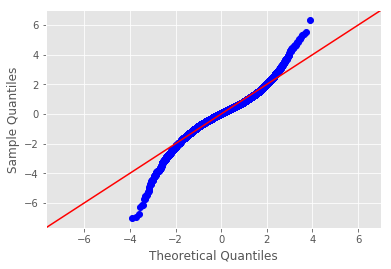

In [185]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

__Observe:__
- The plot above show residuals normally distributed, however, the "tails", is indicative of the errors not being normally distributed.
- NOTE: A good normal QQ plot has all of the residuals lying on or close to the red line.

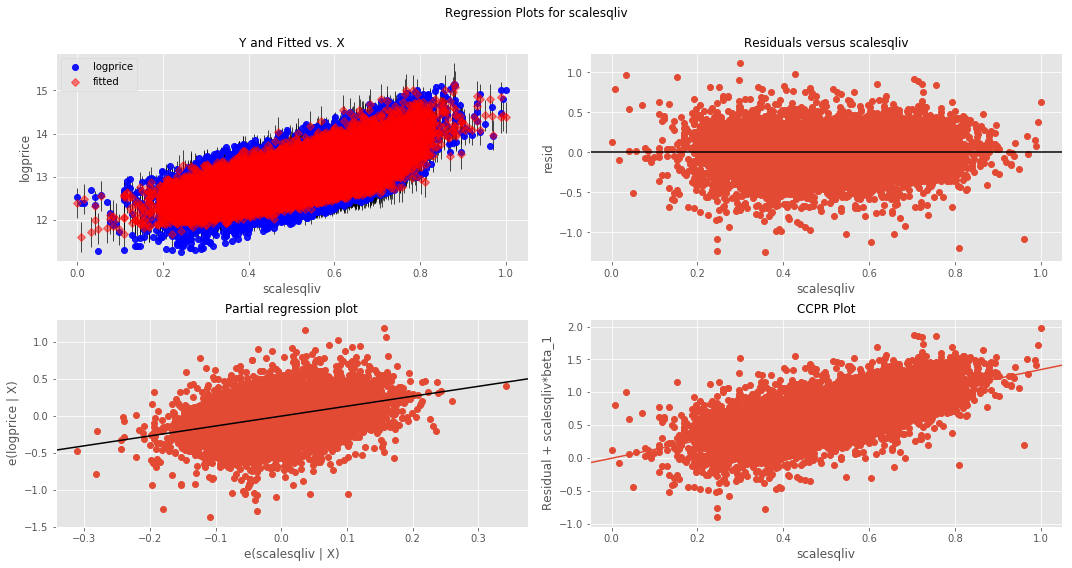

In [186]:
# sqft_living
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "scalesqliv" , fig=fig) 
plt.show()

__Observe:__
- The Residuals versus scalesqliv graph: Since the distance between the dots and the mean value are balanced, the OLS assumption of homoskedasticity hold true.

In [187]:
X_fin_F.columns

Index(['scalesqliv', 'yr_built_(0, 1925]', 'zipAll_98004', 'grad_7', 'grad_6',
       'yr_built_(1925, 1950]', 'grad_8', 'grad_5', 'view_4.0', 'zipAll_98040',
       'zipAll_98033', 'zipAll_98112', 'zipAll_98039', 'grad_9', 'grad_4',
       'view_3.0', 'view_2.0', 'zipAll_98115', 'zipAll_98105', 'zipAll_98117',
       'zipAll_98199', 'zipAll_98103', 'zipAll_98119', 'zipAll_98107',
       'zipAll_98109', 'zipAll_98005', 'zipAll_98052', 'zipAll_98006',
       'zipAll_98122', 'zipAll_98102', 'zipAll_98116', 'scalesqlot',
       'zipAll_98008', 'wf_1.0', 'zipAll_98144', 'zipAll_98136',
       'zipAll_98053', 'zipAll_98029', 'zipAll_98034', 'zipAll_98007',
       'zipAll_98075', 'zipAll_98074', 'zipAll_98125', 'zipAll_98177',
       'zipAll_98027', 'zipAll_98126', 'cond_5', 'yr_built_(2010, 2015]',
       'grad_10', 'view_1.0', 'zipAll_98133', 'zipAll_98072', 'zipAll_98118',
       'cond_2', 'zipAll_98155', 'zipAll_98065', 'zipAll_98011',
       'zipAll_98028', 'zipAll_98077', 'scalebathrms

In [188]:
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 10)
selector = selector.fit(X_fin_F, y)

In [189]:
selector.support_ 

array([ True, False,  True, False, False, False, False, False,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False])

In [190]:
selector.ranking_ 

array([ 1, 74,  1, 54, 52, 75, 55, 51,  1,  1,  7,  1,  1, 56, 53, 44, 64,
        9,  2,  8,  3,  6,  1,  4,  1, 10, 17, 13,  5,  1, 12, 24, 18, 11,
       16, 14, 21, 20, 28, 15, 19, 22, 26, 23, 27, 25, 58, 72, 57, 63, 31,
       30, 34, 68, 37, 36, 35, 38, 29, 71, 40, 59, 87, 60, 42, 43, 41, 46,
       47, 45, 39, 50, 49, 88, 89, 48, 32, 82, 83, 67, 62, 61, 69, 70, 66,
       84, 86, 33,  1, 73, 77, 76, 78, 79, 80, 81, 65, 85])

In [191]:
selected_columns_F = X_fin_F.columns[selector.support_ ]
linreg.fit(X_fin_F[selected_columns_F], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [192]:
selected_columns_F

Index(['scalesqliv', 'zipAll_98004', 'view_4.0', 'zipAll_98040',
       'zipAll_98112', 'zipAll_98039', 'zipAll_98119', 'zipAll_98109',
       'zipAll_98102', 'grad_13'],
      dtype='object')

In [193]:
estimators = selector.estimator_
print(f"Prediction for estimate is based on Model: F")
print(f"estimators.coef_ : {estimators.coef_}")
print(f"estimators.intercept_ : {estimators.intercept_}")

Prediction for estimate is based on Model: F
estimators.coef_ : [2.27307742 0.74489445 0.62108824 0.56368933 0.63892654 0.99645856
 0.56801823 0.58120859 0.56963344 0.7482723 ]
estimators.intercept_ : 11.785447143280123


In [194]:
coeff_df = pd.DataFrame(estimators.coef_, X_fin_F[selected_columns_F].columns, columns=['Coefficient'])  #.sort_values()
coeff_df

,Coefficient
scalesqliv,2.273077
zipAll_98004,0.744894
view_4.0,0.621088
zipAll_98040,0.563689
zipAll_98112,0.638927
zipAll_98039,0.996459
zipAll_98119,0.568018
zipAll_98109,0.581209
zipAll_98102,0.569633
grad_13,0.748272


### Model Validation
#### "Train-test-split"

__Train/Test the Best Model__

### Final Model

__Observe:__

EXPLAINATION: 
- MODEL F:     .876 (88%)  of the variability in Y (target) can be explained using X.

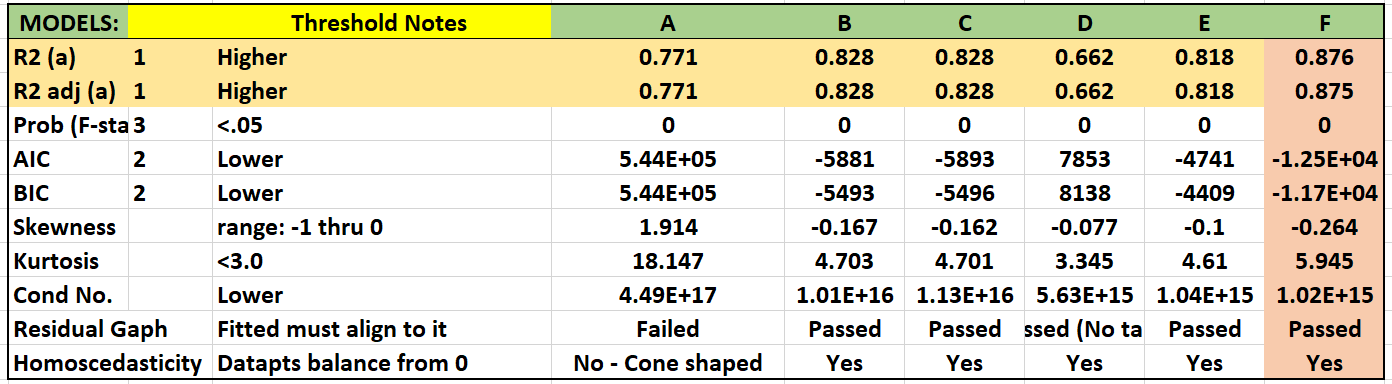

- The table above consolidates the model summaries from all of the models produced in this project.  Reviewed each against the "Threshold Notes" indicated in the table to identify the "best model" to continue the Model Validation (Train-test-split).  The model with the highest R2adj, AIC and BIC values was: _ MODEL F_  
- The important features selected for Non-technical presentation included the following:
    - sqft living; several zipcodes: 98039, 98004, 98112; grade and view
    - variable	coef
const	7.4131
scalesqliv	1.3468
zipAll_98039	1.3359
grad_13	1.2513
zipAll_98004	1.1513
zipAll_98112	1.0702
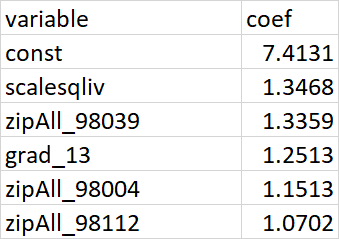

#### explain their impact on the price of a house in this dataset:
-  For every one unit of change in scalesqliv, the change in the price is about 1.35%
-  For every one unit of change in grad, the change in the price is about 1.25%
-  For zipAll_98039, the change in the price is about 1.35%

In [195]:
# Train/Test - MODEL F, based on results above.
X = X_fin_F
y = data_norm["logprice"]

In [196]:
X.columns

Index(['scalesqliv', 'yr_built_(0, 1925]', 'zipAll_98004', 'grad_7', 'grad_6',
       'yr_built_(1925, 1950]', 'grad_8', 'grad_5', 'view_4.0', 'zipAll_98040',
       'zipAll_98033', 'zipAll_98112', 'zipAll_98039', 'grad_9', 'grad_4',
       'view_3.0', 'view_2.0', 'zipAll_98115', 'zipAll_98105', 'zipAll_98117',
       'zipAll_98199', 'zipAll_98103', 'zipAll_98119', 'zipAll_98107',
       'zipAll_98109', 'zipAll_98005', 'zipAll_98052', 'zipAll_98006',
       'zipAll_98122', 'zipAll_98102', 'zipAll_98116', 'scalesqlot',
       'zipAll_98008', 'wf_1.0', 'zipAll_98144', 'zipAll_98136',
       'zipAll_98053', 'zipAll_98029', 'zipAll_98034', 'zipAll_98007',
       'zipAll_98075', 'zipAll_98074', 'zipAll_98125', 'zipAll_98177',
       'zipAll_98027', 'zipAll_98126', 'cond_5', 'yr_built_(2010, 2015]',
       'grad_10', 'view_1.0', 'zipAll_98133', 'zipAll_98072', 'zipAll_98118',
       'cond_2', 'zipAll_98155', 'zipAll_98065', 'zipAll_98011',
       'zipAll_98028', 'zipAll_98077', 'scalebathrms

In [197]:
X.shape

(20412, 98)

__Split data into Training/Testing__

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y) # test_size is set to 0.25
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

15309 5103 15309 5103


### Create Model and Predictions

__Import the estimator object (Linear Regression Model)__

In [199]:
# Import LinearRegression class, instantiate it/create an instance of the model (estimator object) 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()   # Var used to store features and target to perform linear regression

__Use Training Data to train the model__

In [200]:
# Fitting the model to the train data  --- training the algorithm

# Finds the best value for the intercept(B0) and slope(B1), which results in a line that best fits the data.
linreg.fit(X_train, y_train)  # B0, B1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [201]:
coeff_df = pd.DataFrame(linreg.coef_, X.columns, columns=['Coefficient'])  
coeff_df.head(10)

,Coefficient
scalesqliv,1.374989
"yr_built_(0, 1925]",0.090988
zipAll_98004,1.158701
grad_7,-0.454589
grad_6,-0.557912
"yr_built_(1925, 1950]",0.062239
grad_8,-0.354855
grad_5,-0.667036
view_4.0,0.347157
zipAll_98040,0.917485


__Observe:__

- EXPLAINATION:  For every one unit of change in scalesqliv, the change in the price is about 1.35%.

In [202]:
# To see the value of the intercept and slop calculated by the linear regression algorithm for 
#  our dataset.

#To retrieve the intercept:
print(f"linreg.intercept_: {linreg.intercept_}")

#For retrieving the slope:
print(f"linreg.coef_:\n{linreg.coef_}")

linreg.intercept_: -363557465298.2983
linreg.coef_:
[ 1.37498927e+00  9.09875924e-02  1.15870103e+00 -4.54589363e-01
 -5.57912099e-01  6.22385667e-02 -3.54855121e-01 -6.67035857e-01
  3.47156980e-01  9.17484595e-01  8.09254623e-01  1.06891399e+00
  1.32250329e+00 -2.32026128e-01 -6.59331483e-01  2.13326618e-01
  1.28623660e-01  8.24600339e-01  9.59091656e-01  8.16069340e-01
  8.80894940e-01  8.36385424e-01  9.96973179e-01  8.61056408e-01
  1.00607917e+00  7.78812426e-01  6.65104907e-01  6.84213056e-01
  8.22503847e-01  9.92114683e-01  7.59648591e-01  5.79496688e-01
  6.75417289e-01  4.02432636e-01  6.79889488e-01  6.81069606e-01
  5.89300627e-01  6.22223144e-01  5.69793759e-01  6.86748348e-01
  5.86639302e-01  5.77436827e-01  5.67463043e-01  5.94995594e-01
  5.46983064e-01  5.42311914e-01  3.10185603e-01  1.37534761e-01
 -1.31806289e-01  1.31747114e-01  4.65971049e-01  4.93797475e-01
  4.66538873e-01  4.50337958e-02  4.43414551e-01  4.19687849e-01
  4.79920571e-01  4.36668966e-01  4.39

__NOTE__
- This means that for every one unit of change in Min temperature, the change in the Max temperature is about 0.92%.

In [203]:
#linreg.__dict__

__Calculate predictions on Train/Test datasets__

In [204]:
# Now that we have trained our algorithm, it’s time to make some predictions. 
# To do so, we will use our test and train data and see how accurately our algorithm predicts.

# Making predictions on the test and train atasets. 
y_hat_train = linreg.predict(X_train) # y_hat using x_train against B0,B1
y_hat_test = linreg.predict(X_test)

In [205]:
# Predicton estimate for y
y_hat_train  

array([13.14807129, 13.87915039, 13.69537354, ..., 12.93798828,
       12.74969482, 12.52258301])

In [206]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
df_pred_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_hat_train})
df_pred_results.head(10)

,Actual,Predicted
18790,13.161584,13.148071
9934,13.955273,13.879150
2095,13.441544,13.695374
7609,13.560618,13.568115
44,12.641097,12.343994
3655,13.359804,13.424561
4995,13.159659,13.220154
194,12.345835,12.675415
15931,13.429848,13.543213
963,13.353475,13.412109


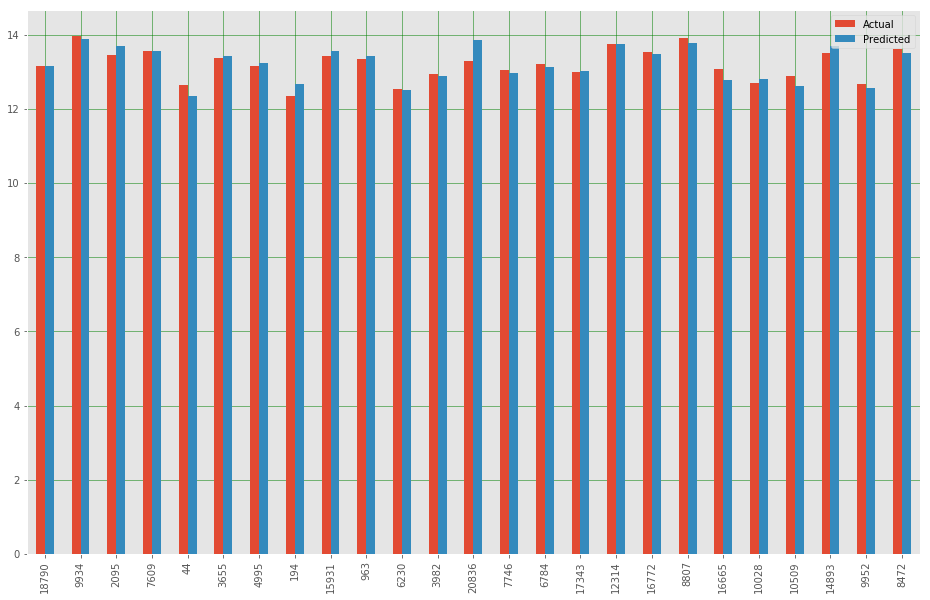

In [207]:
df1 = df_pred_results.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [208]:
# ERROR: ValueError: x and y must be the same size --- Why?

# plt.scatter(X_test, y_test,  color="gray",label="data")
# plt.plot(X_test, y_hat_test, color="red", linewidth=2, label="regression line")
# plt.title("Prediction vs Test Data")
# plt.legend(loc=4)
# plt.show()

- To evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

When using a train test split, you'll compare your residuals for both test set and training set:

$r_{i,train} = y_{i,train} - \hat y_{i,train}$ 

$r_{i,test} = y_{i,test} - \hat y_{i,test}$ 

To get a summarized measure over all the instances in the test set and training set, a popular metric is the (Root) Mean Squared Error:

RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2}$

MSE = $\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$

Again, you can compute these for both the train and the test set. A big difference in value between the test and training set (R)MSE is an indication of overfitting.

In [209]:
# Calculating your residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

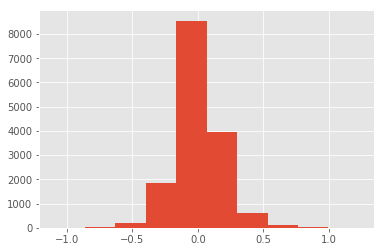

In [210]:
# Plot Residuals Distibution, for train
plt.hist(train_residuals);

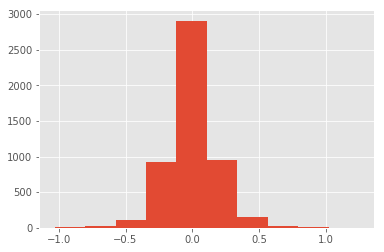

In [211]:
# Plot Residuals Distibution, for test
plt.hist(test_residuals);

__Observe:__
- Residuals are normally distributed

In [212]:
# Calculating the Mean Squared Error
# A good way to compare overall performance is to compare the mean squarred error for the predicted values on the train and test sets.

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)  
test_mse = mean_squared_error(y_test, y_hat_test)
print(f"Train Mean Squared Error (MSE): {train_mse}")
print(f"Test Mean Squared Error (MSE): {test_mse}")
print(f"Train Root Mean Squared Error(RMSE):  {np.sqrt(metrics.mean_squared_error(y_train, y_hat_train))}")
print(f"Test Root Mean Squared Error (RMSE):  {np.sqrt(metrics.mean_squared_error(y_test, y_hat_test))}")

Train Mean Squared Error (MSE): 0.031078551687211242
Test Mean Squared Error (MSE): 0.032992650013953
Train Root Mean Squared Error(RMSE):  0.17629109928527656
Test Root Mean Squared Error (RMSE):  0.18163878994849364


__Observation:__

- RMSE and MSE are similiar, therefore the algorithm between train and test are generalized.  
- Does not indicate a model that is "overfitted" or "underfitted"
- The algorithm is very accurate; a good predictor 
- Using RMSE results, the model was able to predict the value of every house in the train/test set within $TBD of the real price.

__Evaluating the effect of train-test split size__

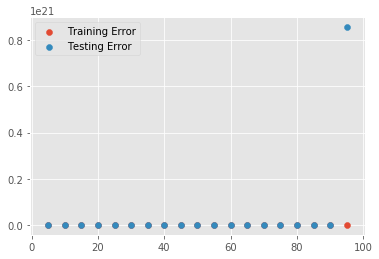

In [213]:
# Iterate over a range of train-test split sizes from .5 to .95. 
# For each of these, generate a new train/test split sample. 
# Fit a model to the training sample and calculate both the training error and the test error (mse)
# for each of these splits. Plot these two curves 
# (train error vs. training size and test error vs. training size) on a graph.

import random
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()
plt.show()

__Evaluating the effect of train-test split size: extension__

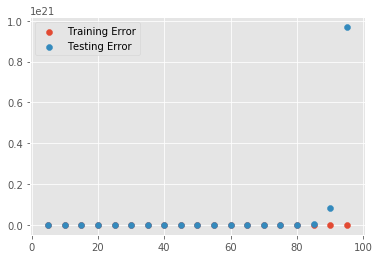

In [214]:
# Repeat the previous example, but for each train-test split size, generate 100 
# iterations of models/errors and save the average train/test error. 
# This will help account for any particularly good/bad models that might have 
# resulted from poor/good splits in the data.

random.seed(8)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()
plt.show()

__Observation__
- The diagram(s) indicates generalization using random data.
- The model works well for future data

### Make Predictions on New Data for Presentation

Prediction: $\hat{y} = \hat mx + \hat c$

In [215]:
# Make Predictions on New Data for Presentation

x_new = 2420
m=1.35
c=7.41
y_new = (m*x_new)+c

print ('Basic Regression Diagnostics')
print ('----------------------------')
print ('Slope:', round(m,2))
print ('Y-Intercept:', round(c,2))
print ('----------------------------')
print ('Model: Y =',round(m,2),'* X +', round(c,2))
y_new

Basic Regression Diagnostics
----------------------------
Slope: 1.35
Y-Intercept: 7.41
----------------------------
Model: Y = 1.35 * X + 7.41


3274.41

In [216]:
time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

Time elapsed (hh:mm:ss.ms) 0:23:17.543020


__THE END__

###  Visualizations_ for Presentation

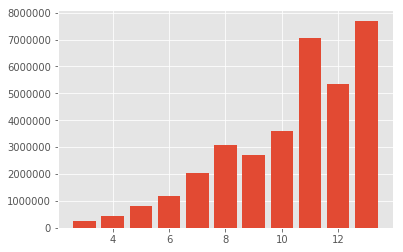

In [217]:
plt.bar(house_df["grade"], house_df["price"]);

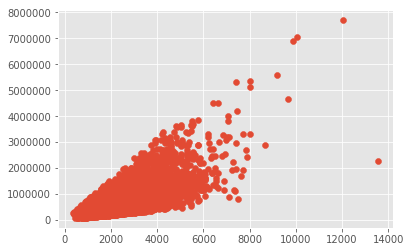

In [218]:
plt.scatter(house_df["sqft_living"], house_df["price"]);

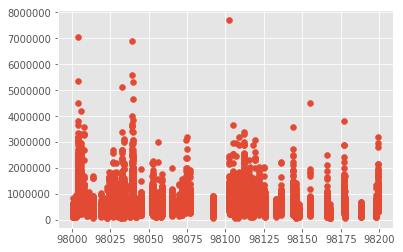

In [219]:
plt.scatter(house_df["zipcode"], house_df["price"])

In [220]:
df_selected_zip = house_df.loc[house_df["zipcode"].isin(["98039","98004","98102", "98040", "98109", "98112","98119" ])]
df_selected_zip

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21,2524049179,2014-08-26,2000000.0,3,2.75,3050,44867,1.0,0.0,4.0,...,9,2330,720,1968,0.0,98040,47.5316,-122.233,4110,20336
26,1794500383,2014-06-26,937000.0,3,1.75,2450,2691,2.0,0.0,0.0,...,8,1750,700,1915,0.0,98119,47.6386,-122.360,1760,3573
27,3303700376,2014-12-01,667000.0,3,1.00,1400,1581,1.5,0.0,0.0,...,8,1400,0,1909,0.0,98112,47.6221,-122.314,1860,3861
43,9270200160,2014-10-28,685000.0,3,1.00,1570,2280,2.0,0.0,0.0,...,7,1570,0,1922,0.0,98119,47.6413,-122.364,1580,2640
66,3394100030,2014-09-09,975000.0,4,2.50,2720,11049,2.0,0.0,0.0,...,10,2720,0,1989,0.0,98004,47.5815,-122.192,2750,11049
69,1802000060,2014-06-12,1330000.0,5,2.25,3200,20158,1.0,0.0,0.0,...,8,1600,1600,1965,0.0,98004,47.6303,-122.215,3390,20158
85,4232902595,2014-11-14,940000.0,3,1.50,2140,3600,2.0,0.0,0.0,...,9,1900,240,1925,0.0,98119,47.6337,-122.365,2020,4800
95,1483300570,2014-09-08,905000.0,4,2.50,3300,10250,1.0,0.0,0.0,...,7,2390,910,1946,1991.0,98040,47.5873,-122.249,1950,6045
100,1952200240,2014-06-11,850830.0,3,2.50,2070,13241,1.5,0.0,0.0,...,9,1270,800,1910,0.0,98102,47.6415,-122.315,2200,4500
103,2450000295,2014-10-07,1090000.0,3,2.50,2920,8113,2.0,0.0,0.0,...,8,2920,0,1950,2010.0,98004,47.5814,-122.196,2370,8113


<BarContainer object of 1315 artists>

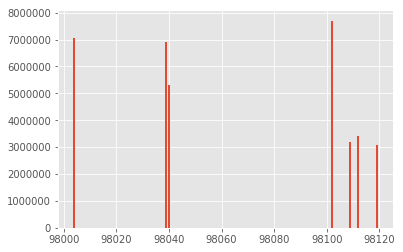

In [221]:
plt.bar(df_selected_zip["zipcode"], df_selected_zip["price"])

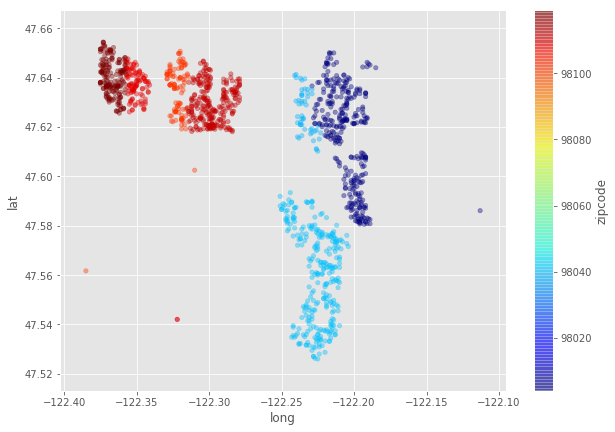

In [222]:
df_selected_zip.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(10,7), c="zipcode", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.savefig('map2.png')

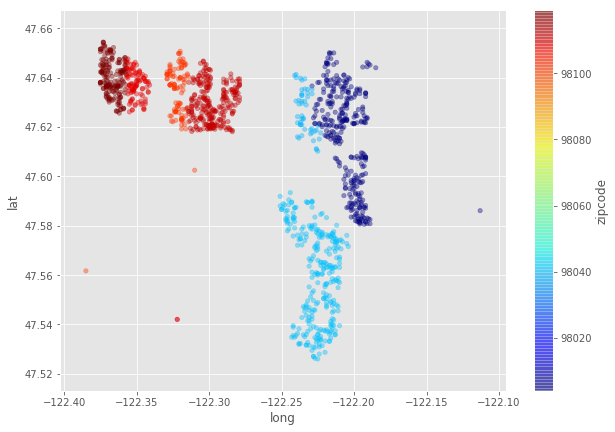

In [223]:
df_selected_zip.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(10,7), c="zipcode", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.savefig('map2.png')

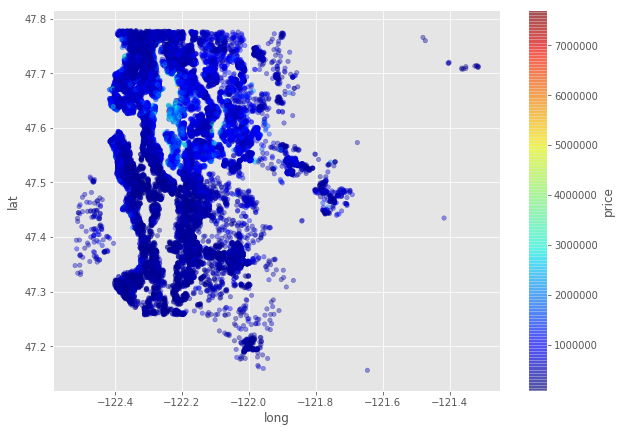

In [224]:
house_df.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(10,7), c="price", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.savefig('map2.png')

In [225]:
# ---
df_Notselected_zip = house_df.loc[house_df["zipcode"].isin(["98039","98004","98102", "98040",  "98109", "98112","98119" ])== False]
df_Notselected_zip

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,0,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,7,1060,0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [226]:
#plt.bar(df_Notselected_zip["zipcode"], df_Notselected_zip["price"])

In [227]:
#plt.bar(df_Notselected_zip["zipcode"], df_Notselected_zip["price"])

In [228]:
df_selected_zip.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

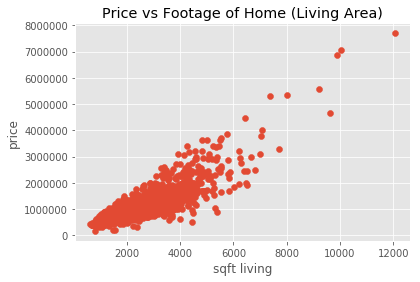

In [229]:
plt.scatter(df_selected_zip["sqft_living"], df_selected_zip["price"]);

# Add title and axis names
plt.title("Price vs Footage of Home (Living Area)")
plt.xlabel("sqft living")  
plt.ylabel("price")
plt.show()

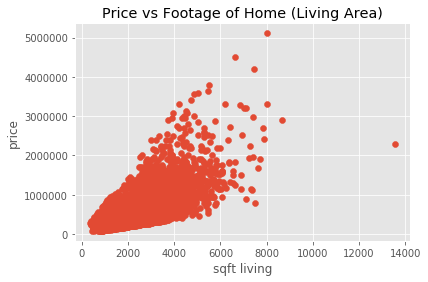

In [230]:
plt.scatter(df_Notselected_zip["sqft_living"], df_Notselected_zip["price"]);

# Add title and axis names
plt.title("Price vs Footage of Home (Living Area)")
plt.xlabel("sqft living") 
plt.ylabel("price")
plt.show()

In [231]:
df_Notselected_zip.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.028200e+04,2.028200e+04,20282.000000,20282.000000,20282.000000,2.028200e+04,20282.000000,20282.000000,20282.000000,20282.000000,20282.000000,20282.000000,20282.000000,20282.000000,20282.000000,20282.000000,20282.000000,20282.000000,20282.000000,20282.000000
mean,4.598454e+09,5.005928e+05,3.355685,2.092878,2043.758209,1.550319e+04,1.484075,0.006558,0.221477,3.401785,7.600089,1765.413667,272.577655,1971.787792,61.984863,98078.617247,47.556623,-122.210124,1958.044917,13029.626664
std,2.884420e+09,2.920755e+05,0.915063,0.749492,877.614560,4.266477e+04,0.536147,0.080715,0.749706,0.646582,1.137752,805.184773,426.053255,28.811160,346.213580,53.859299,0.142036,0.143518,668.056619,28083.804312
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124242e+09,3.150000e+05,3.000000,1.500000,1410.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1952.000000,0.000000,98033.000000,47.457900,-122.329000,1470.000000,5169.000000
50%,3.905030e+09,4.350000e+05,3.000000,2.250000,1890.000000,7.620000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1976.000000,0.000000,98065.000000,47.564600,-122.225500,1820.000000,7620.000000
75%,7.352200e+09,6.040000e+05,4.000000,2.500000,2510.000000,1.057600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2180.750000,520.000000,1997.000000,0.000000,98118.000000,47.682200,-122.117000,2320.000000,10000.000000
max,9.900000e+09,5.110000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


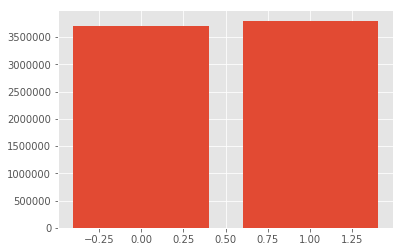

In [232]:
plt.bar(df["view_4.0"], df["price"]);

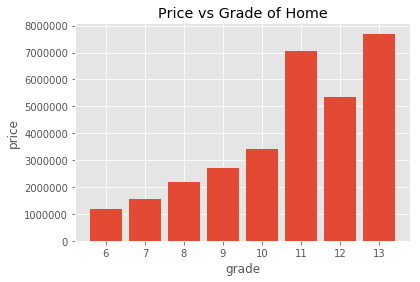

In [233]:
plt.bar(df_selected_zip["grade"], df_selected_zip["price"]);

# Add title and axis names
plt.title("Price vs Grade of Home")
plt.xlabel("grade")  
plt.ylabel("price")
plt.show()

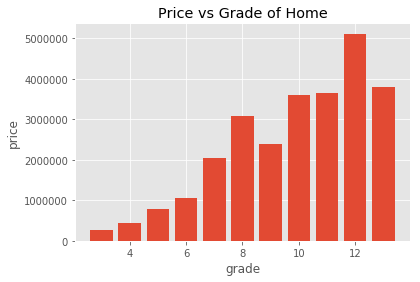

In [234]:
plt.bar(df_Notselected_zip["grade"], df_Notselected_zip["price"]);

# Add title and axis names
plt.title("Price vs Grade of Home")
plt.xlabel("grade")  
plt.ylabel("price")
plt.show()

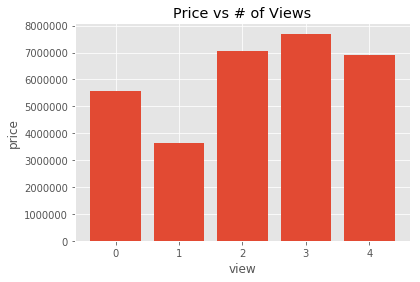

In [235]:
plt.bar(df_selected_zip["view"], df_selected_zip["price"]);

# Add title and axis names
plt.title("Price vs # of Views")
plt.xlabel("view")  
plt.ylabel("price")
plt.show()

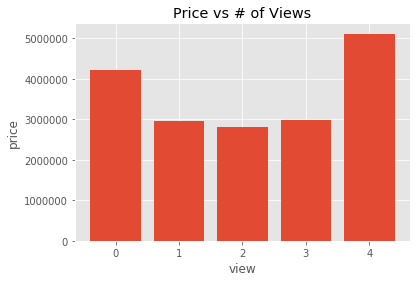

In [236]:
plt.bar(df_Notselected_zip["view"], df_Notselected_zip["price"]);

# Add title and axis names
plt.title("Price vs # of Views")
plt.xlabel("view")  
plt.ylabel("price")
plt.show()

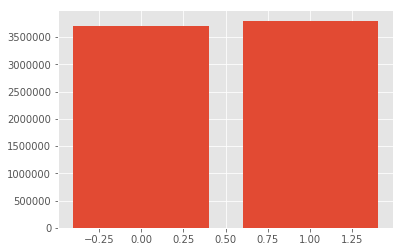

In [237]:
plt.bar(df["grad_13"], df["price"]);

In [238]:
df_Notselected_zip.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.028200e+04,2.028200e+04,20282.000000,20282.000000,20282.000000,2.028200e+04,20282.000000,20282.000000,20282.000000,20282.000000,20282.000000,20282.000000,20282.000000,20282.000000,20282.000000,20282.000000,20282.000000,20282.000000,20282.000000,20282.000000
mean,4.598454e+09,5.005928e+05,3.355685,2.092878,2043.758209,1.550319e+04,1.484075,0.006558,0.221477,3.401785,7.600089,1765.413667,272.577655,1971.787792,61.984863,98078.617247,47.556623,-122.210124,1958.044917,13029.626664
std,2.884420e+09,2.920755e+05,0.915063,0.749492,877.614560,4.266477e+04,0.536147,0.080715,0.749706,0.646582,1.137752,805.184773,426.053255,28.811160,346.213580,53.859299,0.142036,0.143518,668.056619,28083.804312
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124242e+09,3.150000e+05,3.000000,1.500000,1410.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1952.000000,0.000000,98033.000000,47.457900,-122.329000,1470.000000,5169.000000
50%,3.905030e+09,4.350000e+05,3.000000,2.250000,1890.000000,7.620000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1976.000000,0.000000,98065.000000,47.564600,-122.225500,1820.000000,7620.000000
75%,7.352200e+09,6.040000e+05,4.000000,2.500000,2510.000000,1.057600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2180.750000,520.000000,1997.000000,0.000000,98118.000000,47.682200,-122.117000,2320.000000,10000.000000
max,9.900000e+09,5.110000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<BarContainer object of 20412 artists>

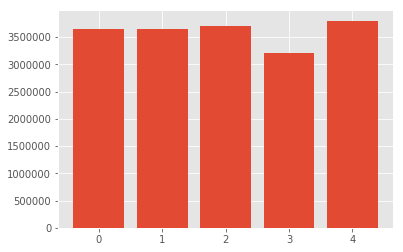

In [239]:
plt.bar(df_clean["view"], df_clean["price"])

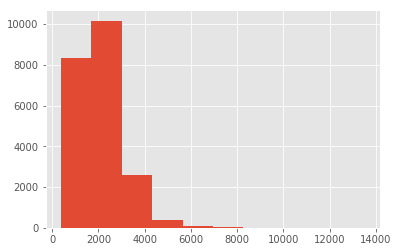

In [240]:
plt.hist(house_df["sqft_living"]);

In [241]:
house_df[house_df["bedrooms"] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580,1947,0.0,98103,47.6878,-122.331,1330,4700


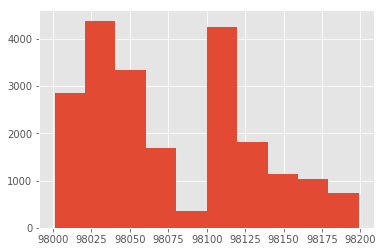

In [242]:
plt.hist(house_df["zipcode"]);

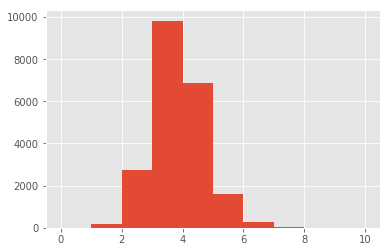

In [243]:
plt.hist(house_df["bedrooms"], range=(0,10));

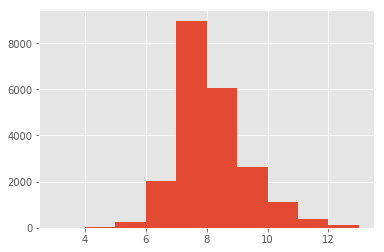

In [244]:
plt.hist(house_df["grade"]);

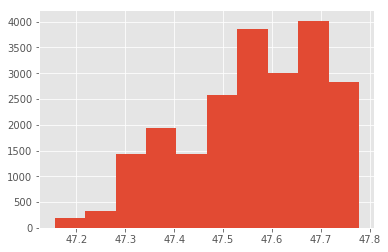

In [245]:
plt.hist(house_df["lat"]);